In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
#sns.set_theme(style = "ticks", color_codes = True)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

#### Data Sources

In [5]:
USED_CARS = ("data/vehicles.csv")

# The Art of Buying a "New" Old Car.
## Can we have a Simple Predictor of cars' price and condition? 

## Abstract

Buying a "new" used car could turn out to be a serious challenge. A buyer should understand the meaning of words like "cylinder", "odometer", "transmission", "title status", SUV, hatchback, etc. There are numerous online platforms, which offer vehicles after filtering according predefined criteria. Comparison of models, capacity, horsepowers and other technical features could be extremely time-consuming and frustrating endeavour. Therefore, an algorithm predicting a car's price and/or its condition would be very useful, especially for those who know nothing about cars. For example, a model returning a car's price (Hypothesis No. 1) or its condition (Hypothesis no. 2) after entering requirements such as year of manufacturing, manufacturer, location, maximum travelled distance, etc. would be very, very beneficial. It will save time and will reduce the risk of purchasing a more expensive or in a poor condition vehicle. Thus, this paper examines the opportunity cars' prices and their condition to be predicted. Regression is used for price prediction, and Classification - for guessing vehicles' condition. Data exploration showed that many attributes of the dataset (used for modelling) should be removed. This, perhaps, was among the reasons for obtaining results below the desired ones. Although both hypotheses could not be approved unconditionally, there is room for further research and for model improvement if a more comprehensive dataset is available. 

*Keywords*: Machine Learning, Supervised Learning, Linear Regression, Classification, SGDClassifier, Random Forest Classifier, Adaptive Boosting, Used Cars.

## Introduction

Buying a car is a trivial thing. Most adults possess one. Thus, at least once in a life a man asks himself if he needs a vehicle and if he wants to buy one. The answer might be negative. For example, one might feel uncertain about his driving skills, including to pass driving tests; or a person might just do not need a car, or does not have enough money at the given moment; or he might simply prefer to preserve his own nerves. In case of affirmative, however, buying a car might turn into an extremely frustrating and a life-stressing event.

A positive answer to the first question might lead to a terrible dilemma (see the pictures below): "*Do I want a new or a used car?*". Usually, the new one would be expensive and needs roads in good conditions (because it is not so smart to invest a lot of money in something that will be crashed by poor road infrastructure), adequate parking space (since it is not wise to leave a new and most likely luxurious car under open air, both during summer and winter), sufficient means for maintenance (because spare parts and repairs are quite expensive in fact), etc.

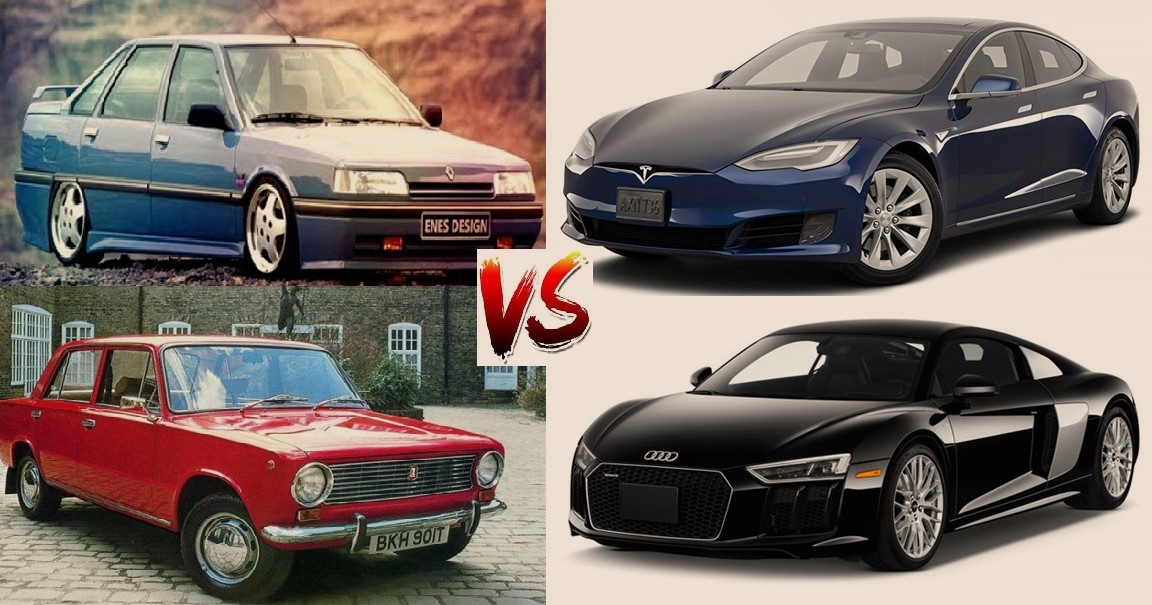

Top left corner: Renault Manager; Top right corner: Tesla Model S; Down left corner: LADA 1200; Down right corner: Audi R8. *Sources: Google Images*

Still, if a man decides to buy a car, a used one, problems do not come to an end. On the contrary. They have just begun. Choice normally depends on the available budget, the purpose the car will serve (i.e. for shopping, driving kids, travelling in the country or abroad, going to work, etc.), and the buyer's needs (e.g. a big car for the family, or a smaller one for shopping and fun). Thus, the soon-to-be owner of a "new" used car should learn what is the difference between, for example, *hatchback, sedan* and *SUV* in order to choose the one, which will meet his needs. It is also highly advisable to understand what is the difference between electricity, petrol, diesel, and gas driven automobiles, which, at least, is linked to fuel consumption and costs. Cars' prices seem to depend on other variables, too, such as manufacturer, model, engine volume, and on many other characteristics. Details about purchasing used cars are well explained in [this site](https://www.nerdwallet.com/article/loans/auto-loans/buy-used-car) [1].

At first sight, the above listed considerations sound like a rather trivial problem. However, this is not so for most  women[2]* and for some men. While the vast majority of men seem to be born with natural knowledge of cars (as is widely believed that most women have innate sewing and cooking skills), automobile construction and what makes a car to move forth and back is almost a puzzle for females. Therefore, for most of them (as for some men) buying a car could turn into a nightmare. Because: first, they need to learn and to understand the meaning of words like "horse powers" and "differential lock", and why these matter; second, googling and reviewing ads on the Internet is a time consuming endeavour; and third, because still there is a risk of paying for a used car more than its real price, and getting a nice looking but in poor condition vehicle.

$^\ast$ see page 10 of the excerpt from "*How to Buy an Excellent Used Car: A Companion Guide for Women*" by  Leith C. MacArthur, available online [here](https://books.google.bg/books?id=Q4Wgnbk-N_gC&pg=PA7&dq=How+to+Buy+an+Excellent+Used+Car:+A+Companion+Guide+for+Women&hl=en&sa=X&ved=2ahUKEwiBzo2QibHsAhWGuIsKHTVtA4gQ6AEwAHoECAAQAg#v=onepage&q=How%20to%20Buy%20an%20Excellent%20Used%20Car%3A%20A%20Companion%20Guide%20for%20Women&f=false).

This paper tries to find a model that predicts a car's price and condition on the basis of its features. The study is organised into five chapters. The first explains why buying a used car could be a serious issue. Chapter 2 suggests hypotheses for solving this tremendous problem. The work continues with obtaining, cleaning, exploring and visualizing data on used cars (Chapter 3). It is followed by modelling and testing algorithms that try to describe the relationship between selected variables (Chapter 4). The last part concludes.  Contents is listed below.

## Table of Contents

No | CHAPTER / SECTION | No | CHAPTER / SECTION
:- |:- |:- |:-
 | *Introduction* |  |  
**1** | **Problem definition: Nobody is interested in simplyfying and easing purchase of used cars** | 3.3.6 | Explore and visualize ODOMETER                        
**2** | **Possible problem solution (suggest hypothesis): Data could help future buyers** | 3.3.7 | Explore and visualize TITLE STATUS 
**3** | **Prepare data for testing hypothesis: obtain, clean, explore, visualize** | 3.3.8 | Explore and visualize TRANSMISSION
3.1 | Obtain data | 3.3.9 | Explore and visualize TYPE 
3.2 | Clean data | 3.3.10 | Explore and visualize STATE
3.2.1 | Clean and handle unique values in URL and descriptive columns | 3.3.11 | Explore GEO LOCATION
3.2.2 | Clean and handle unique values in REGION column | **4** | **Testing Hypoteses and Modelling**
3.2.3 | Clean and handle unique values in PRICE column | 4.1 | Testing Hypothesis No. 1 with Regression
3.2.4 | Clean and handle unique values in YEAR column | 4.1.1 | Separate attributes and target
3.2.5 | Clean and handle unique values in MANUFACTURER column | 4.1.2 | Preprocessing for Regression
3.2.6 | Clean and handle unique values in MODEL column | 4.1.3 | Model Training and Improvement
3.2.7 | Clean and handle unique values in CONDITION column | 4.1.3.A | Linear Regression without adjustment
3.2.8 | Clean and handle unique values in CYLINDERS column | 4.1.3.B | Linear Regression with adjustment
3.2.9 | Clean and handle unique values in FUEL column | 4.1.4 | Summary of Linear Regressions
3.2.10 | Clean and handle unique values in ODOMETER column | 4.1.5 | Model Selection
3.2.11 | Clean and handle unique values in TITLE STATUS column | 4.1.6 | Present a complete regression solution (Pipeline)
3.2.12 | Clean and handle unique values in TRANSMISSION column | 4.2 | Testing Hypothesis No. 2 with Classification
3.2.13 | Clean and handle unique values in DRIVE column | 4.2.1 | Separate attributes and labels
3.2.14 | Clean and handle unique values in SIZE column | 4.2.2 | Preprocessing for Classification
3.2.15 | Clean and handle unique values in TYPE column | 4.2.3 | Model Training and Improvement
3.2.16 | Clean and handle unique values in PAINT COLOR column | 4.2.3.A | SGDClassifier
3.2.17 | Clean and handle unique values in STATE column | 4.2.3.B | Random Forest Classifier
3.2.18 | Clean and handle unique values in LONG and LAT columns | 4.2.3.C | Adaptive Boosting Classifier
3.3 | Exploratory Data Analysis and Visualization | 4.2.4 | Summary of Classification
3.3.1 | Explore and visualize PRICE | 4.2.5 | Model Selection
3.3.2 | Explore and visualize YEAR | 4.2.6 | Present a complete classification solution (Pipeline)
3.3.3 | Explore and visualize MANUFACTURER | **5** | **Conclusion and Topics for Further Discussion**
3.3.4 | Explore and visualize CONDITION | References
3.3.5 | Explore and visualize FUEL |  |  
 


## 1. Problem definition: Nobody is interested in simplifying and easing purchase of used cars

Most car dealers develop and maintain web platforms with information and search options about the vehicles they sell (e.g. [www.cars.com](https://www.cars.com/) and [www.carmax.com](https://www.carmax.com/cars) in the United States, [www.mobile.de](https://www.mobile.de/?lang=en) in Germany, [www.motors.co.uk](https://www.motors.co.uk/used-cars/) in the United Kingdom, and [www.mobile.bg](https://www.mobile.bg/pcgi/mobile.cgi) in Bulgaria). Many, many vehicles are offered through these platforms. After filtering, one could end up with a list of 2000 or 1000 cars for review, depending on his search criteria. Nonetheless, still there is a risk of buying an expensive car or one of a poor quality.

A right "search and take" approach for buying cars most likely does not exists. Actually, the theme is not a subject of significant scientific interest, probably because [majority of scientists are men](https://www.pnas.org/content/117/9/4609), and as mentioned earlier many of them are born with innate sense for cars. Hence, no need for whatever research on topics like "what is important for used cars", or "practical differences between new and used cars", etc. A brief Google Scholar [search](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=%22buying+used+cars%22&btnG=) reveals that purchase of used cars was a topic of interest for a foreign student in the USA, who worked on a [digital service](https://uh-ir.tdl.org/handle/10657/5641?show=full) for assisting people with buying used cars (the paper is not publicly available due to access rights restrictions), and of a conference paper exploring consumer preferences in Japan through Logistic Regression and Decision Tree. The paper is titled "Feature Analysis of Customers Purchasing Cars in Japan"[3] and, according to its abstract, the authors worked on predicting buyers’ preferences.

Datasets or other forms of structured information about used cars' characteristics is not publicly available (and most likely does not exist) save the dataset published on [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data) and used in this paper.

There are a lot of non-scientific publications (e.g. [here](https://www.moneysavingexpert.com/car-finance/buying-used-car/), [here](https://www.citizensadvice.org.uk/consumer/buying-or-repairing-a-car/buying-a-used-car/), and [here](https://www.which.co.uk/reviews/new-and-used-cars/article/how-to-buy-the-best-car/how-to-buy-the-best-used-car-anNPo1k4R4hS)) suggesting various strategies for finding the right used car. However, still **there is not a tool, which automatically could (1) tell what the price of a vehicle with given characteristic is expected to be, and (2) how likely its value and other features are predictors of its technical condition**. It should be noted here that both would serve not only future clients but the sellers, too. If such a tool existed, the latter could check their expectations against already published offers for similar cars.

## 2. Possible problem solution (suggest hypothesis): Data could help future buyers

A general solution to the problem could hardly exist. Nonetheless, knowing price determinants and the interplay between them could be of some help.

In order to verify if this is possible, it could be assumed that **a car's price is a function of numerous characteristics (e.g. its model, year of manufacturing, selling location, etc.) (Hypothesis No. 1)** (Hypothesis No. 0.1 is the opposite statement: a car's price is not a function of its other features). Furthermore, some online car platforms allow sellers to state vehicle's condition (for example "excellent", "good", "poor", "in parts", etc.). Therefore, it is also assumed that **a car's condition is determined by its unique features (Hypothesis No. 2)** (Hypothesis No. 0.2 states: "a car's condition is not a function of its attributes").

Several algorithms are tested below for proving or refuting these hypotheses. **Regression** is used for checking if and to what extent the price is a function of car features, and **Classification** should make clear if these features could predict a car's condition.

Models' performance is evaluated with different metrics. The assumption is that the **Mean Squared Error (MSE) / the Root Mean Square Error (RMSE)** is a more appropriate measure for regression tasks than $R^2$, although the latter is also computed. The initial expectation is that a model is a good predictor if $R^2$ is higher than 70%. Classifications, on the other hand, are measured by **"f1 score"** and **"accuracy"**. A good classifier should reach 70% and higher on f1 score. Other metrics and visualisations are used as well, where appropriate.

## 3. Prepare data for testing hypothesis: obtain, clean, explore and visualize

Lack of scientific interest in used cars perhaps is the reason for absence of datasets and/or of other forms of structured or unstructured information. This hindrance could be overcome by scraping, i.e. through automatic data extraction from car selling / buying platforms. Perhaps, the only existing preliminary compiled dataset is the one used for testing the above stated hypotheses.

### 3.1. Obtain data

The "Used Cars" dataset is taken from [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data)[7]. According to its author - Austin Reese, the "data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories". [Craiglist](https://duluth.craigslist.org/), as [Wikipedia](https://en.wikipedia.org/wiki/Craigslist) describes it, is "an American classified advertisements website with sections devoted to jobs, housing, for sale [including cars and trucks], items wanted, services, community service, gigs, résumés, and discussion forums".

The file is stored in a constant (USED_CARS) just below the `import` commands at the top of the page. The work starts with calling and saving it. A quick check of the DataFrame follows below.

In [6]:
used_cars = pd.read_csv(USED_CARS)

In [7]:
used_cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [8]:
used_cars.shape

(423857, 25)

The dataset was read properly. It has 423 857 entries and 25 features. Next steps require checking missing values, unnecessary columns, and making features' names compliant with Python rules.

### 3.2. Clean data

A brief column check shows that cars are described with various characteristics. The first column ("id") contains unique numbers. The second one ("url") displays a URL address where the selling add was published. "Region" column indicates vehicle's location. Web link to a regional selling platform is given in the next feature ("region_url"). Thereafter is the "price" column - the amount of money the car owner demands for selling his car; then comes the "year" when the car was manufactured; it is followed by "manufacturer" - the company, which produced the car; "model" column shows the group which a cars belong to; a "condition" indicates if a car would need repair works, or if it is ready for driving. The last columns hold data on cars location, including "county", "state" and geographical coordinates. 

This initial check also shows that column names are properly titled and do not need renaming.

In [9]:
used_cars.columns.unique()

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

It is important to check if there are NaN values and what columns type is. This is performed by the `info()` function which prints DataFrame's general summary. The outcome below shows that "county" column is empty; hence, it will be removed. Also, unnecessary are columns with unique values for each entry (i.e. with high entropy). Checks and handling of unique values follows below.

In [10]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

#### 3.2.1. Check and handle unique values in URL and descriptive columns

All columns are checked for unique values.

In [11]:
print(used_cars.id.nunique())
print(used_cars.id.nunique() == len(used_cars.id))

423857
True


In [12]:
print(used_cars.url.nunique())
print(used_cars.url.nunique() == len(used_cars.url))

423857
True


In [13]:
print(used_cars.region_url.nunique())
print(used_cars.region_url.nunique() == len(used_cars.region_url))

413
False


In [14]:
print(used_cars.vin.nunique())
print(used_cars.vin.nunique() == len(used_cars.vin))

103588
False


In [15]:
print(used_cars.image_url.nunique())
print(used_cars.image_url.nunique() == len(used_cars.image_url))

222413
False


In [16]:
print(used_cars.description.nunique())
print(used_cars.description.nunique() == len(used_cars.description))

275765
False


All but "url" and "id" columns contain repeating values. If these are turned into dummies, number of features will reach a million and more. This could complicate modelling and might be a reason for invalid results. Furthermore, unique values in "url" and "id" hardly would affect vehicles' prices and their condition. Therefore, the empty column, "url", the one with unique values, those with textual description, and the vehicle identification number (vin) (i.e. features with high entropy) are removed from the DataFrame. The cleaned table is stored in a new variable - `used_cars_clean` so as to keep the initial dataset intact.

In [17]:
used_cars_clean = used_cars.drop(["url", "region_url", "vin", "image_url", "description", "county"], axis = 1)

In [18]:
used_cars_clean.shape

(423857, 19)

The new DataFrame looks better. It is important to see now all unique values in each column, to consider if they would be relevant for modelling, and if so - how to proceed with NaNs (cells with missing values). Prior to that, however, "id" is made an index column (otherwise, if kept, its values will be scaled and used for modelling, which would be quite wrong).

In [19]:
used_cars_clean

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423852,7184919761,duluth / superior,1600,2006.0,hyundai,sonata,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,mn,46.8348,-92.0742
423853,7184844576,duluth / superior,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,mn,46.9369,-91.9325
423854,7184805809,duluth / superior,700,1994.0,ford,f-150,fair,6 cylinders,gas,212000.0,clean,manual,rwd,NaN,NaN,green,mn,46.7715,-92.1279
423855,7184791927,duluth / superior,3800,1999.0,lincoln,town car,excellent,8 cylinders,gas,160000.0,clean,automatic,rwd,NaN,sedan,NaN,mn,46.8433,-92.2550


In [20]:
used_cars_clean = used_cars_clean.set_index("id")

In [21]:
used_cars_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336
7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648


#### 3.2.2. Check and handle unique values in REGION column

In [22]:
print(used_cars_clean.region.nunique())
used_cars_clean.region.unique()

404


array(['duluth / superior', 'new haven', 'albuquerque', 'lubbock',
       'fargo / moorhead', 'albany', 'northwest CT', 'washington, DC',
       'eastern NC', 'winchester', 'bellingham', 'mcallen / edinburg',
       'mankato', 'space coast', 'st augustine', 'tallahassee',
       'kennewick-pasco-richland', 'binghamton', 'treasure coast',
       'athens', 'palm springs', 'odessa / midland', 'redding',
       'reno / tahoe', 'san angelo', 'san antonio', 'siskiyou county',
       'stockton', 'clovis / portales', 'delaware', 'farmington',
       'las cruces', 'roswell / carlsbad', 'santa fe / taos',
       'daytona beach', 'florida keys', 'ft myers / SW florida',
       'rochester', 'gainesville', 'heartland florida', 'jacksonville',
       'orlando', 'lakeland', 'north central FL', 'ocala',
       'okaloosa / walton', 'knoxville', 'buffalo', 'finger lakes',
       'long island', 'hudson valley', 'ithaca', 'monroe',
       'zanesville / cambridge', 'auburn', 'inland empire', 'panama city',

Cars are located in 404 regions. Undoubtedly, area (location) might influence a car's price and its condition (good roads - good condition). However, for this particular exercise, it is assumed that instead of "region", the model / predictor will work sufficiently well with other location identifier such as "state" or geographical coordinates. There are 50 states in the United States - much more manageable number than the one if "region" is converted into numericals with `get_dummies()`. Hence, "region" column should be removed but only after checking if "state" feature is complete.

#### 3.2.3. Check and handle unique values in PRICE column

In [23]:
print(used_cars_clean.price.nunique())
used_cars_clean.price.unique()

16305


array([  6995,   8750,  10900, ..., 101999,  25871,   9584], dtype=int64)

"Price" column seems in order: it does not have missing values and the entires' type is numeric (int64). This column does not require further manipulation.

#### 3.2.4. Check and handle unique values in YEAR column

In [24]:
print(used_cars_clean.year.nunique())
used_cars_clean.year.unique()

111


array([2000., 2013., 2003., 2007., 2012., 2010., 2011., 2014., 2004.,
       2009., 2008., 1994., 1997., 2019., 1980., 2015., 2018., 2016.,
       2006., 2017., 2005., 1964., 1998., 2001., 2002., 1937., 1996.,
       1995., 1989., 1949., 1952., 1990., 1967., 1992., 1993., 1999.,
       1986., 1975., 1970., 1985., 2020., 1966., 1963., 1981., 1938.,
       1972., 1983., 1951., 1947., 1940., 1974., 1987., 1968., 1969.,
       1991., 1979., 1971., 1958., 1955., 1960., 1927., 1950., 1973.,
       1962., 1978., 1977., 1988., 1959., 1976., 1961., 1984., 1953.,
         nan, 1982., 1965., 1957., 1900., 1932., 1933., 1934., 2021.,
       1956., 1930., 1928., 1931., 1929., 1941., 1939., 1919., 1948.,
       1926., 1946., 1936., 1954., 1923., 1935., 1942., 1921., 1944.,
       1924., 1901., 1918., 1913., 1945., 1920., 1943., 1917., 1912.,
       1925., 1915., 1922., 1911.])

"YEAR" column has NaN values. The code line below identifies and prints them out.

In [25]:
cars_empty_years = used_cars_clean[used_cars_clean["year"].isna()]
cars_empty_years

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,,,
7194993460,"washington, DC",34899,NaN,NaN,des-Benz GLA,NaN,4 cylinders,NaN,17.0,clean,automatic,NaN,NaN,SUV,grey,dc,39.1724,-77.1646
7194381506,"washington, DC",26995,NaN,NaN,des-Benz GLA,NaN,4 cylinders,NaN,28000.0,clean,automatic,NaN,NaN,SUV,red,dc,39.1724,-77.1646
7193758457,"washington, DC",49900,NaN,rover,velar,NaN,4 cylinders,gas,18102.0,clean,automatic,4wd,NaN,SUV,black,dc,39.1724,-77.1646
7193758272,"washington, DC",68500,NaN,rover,sport,NaN,6 cylinders,NaN,15811.0,clean,automatic,4wd,NaN,SUV,black,dc,39.1724,-77.1646
7194894376,santa fe / taos,47900,NaN,NaN,Grand Caravan,NaN,6 cylinders,NaN,18.0,clean,automatic,fwd,NaN,van,silver,nm,39.6744,-104.9990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194282699,western slope,56900,NaN,NaN,a Sienna,NaN,6 cylinders,gas,21294.0,clean,automatic,fwd,NaN,van,black,co,39.6744,-104.9990
7193659482,western slope,51900,NaN,NaN,a Sienna,NaN,6 cylinders,gas,1805.0,clean,automatic,fwd,NaN,van,red,co,39.6744,-104.9990
7184674796,norfolk / hampton roads,14900,NaN,NaN,n Altima,NaN,4 cylinders,gas,46513.0,NaN,automatic,fwd,NaN,sedan,grey,va,37.5236,-77.3209


Too many rows (more than 95000) miss values in "YEAR" column. Moment of manufacturing is an important determinant of a car's price - older cars are cheaper, and newer - more expensive. Values in this column are not a function of previous rows or of following entries. One way to manually fill NaNs is to check when the respective model was released on the market for the first time. However, this would be a time consuming work (for 95 000 entries). Therefore, all rows with NaNs in "YEAR" are removed (see below). Still, the DataFrame has sufficient entries for modelling.

In [26]:
used_cars_clean = used_cars_clean.dropna(subset = ["year"])

In [27]:
used_cars_clean

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336
7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184919761,duluth / superior,1600,2006.0,hyundai,sonata,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,mn,46.8348,-92.0742
7184844576,duluth / superior,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,mn,46.9369,-91.9325
7184805809,duluth / superior,700,1994.0,ford,f-150,fair,6 cylinders,gas,212000.0,clean,manual,rwd,NaN,NaN,green,mn,46.7715,-92.1279


#### 3.2.5. Check and handle unique values in MANUFACTURER column

There are 43 unique manufacturers and certain number of rows with a NaNs. These are displayed below.

In [28]:
print(used_cars_clean.manufacturer.nunique())
used_cars_clean.manufacturer.unique()

43


array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'ram', nan, 'buick', 'jeep', 'dodge', 'subaru', 'nissan', 'audi',
       'rover', 'lexus', 'honda', 'chrysler', 'mini', 'pontiac',
       'mercedes-benz', 'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen',
       'jaguar', 'acura', 'saturn', 'mazda', 'mercury', 'lincoln',
       'infiniti', 'ferrari', 'fiat', 'tesla', 'land rover',
       'harley-davidson', 'datsun', 'alfa-romeo', 'morgan',
       'aston-martin', 'porche', 'hennessey'], dtype=object)

In [29]:
cars_empty_manufacturer = used_cars_clean[used_cars_clean["manufacturer"].isna()]
cars_empty_manufacturer

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,,,
7195098998,albuquerque,37500,2009.0,NaN,international 8600,excellent,6 cylinders,diesel,NaN,clean,manual,fwd,full-size,truck,white,nm,32.7093,-114.4910
7183944758,duluth / superior,12375,2004.0,NaN,F350 XLT Super Duty,excellent,NaN,diesel,204496.0,clean,automatic,4wd,full-size,pickup,black,mn,46.4343,-92.7624
7191854721,lubbock,9500,1996.0,NaN,1996 Corvette,excellent,8 cylinders,gas,65000.0,clean,manual,rwd,NaN,convertible,silver,tx,33.5059,-102.0090
7183461722,duluth / superior,1500,2005.0,NaN,poniac grand am,fair,NaN,gas,196000.0,clean,automatic,fwd,mid-size,coupe,NaN,mn,46.7546,-92.5408
7183387959,duluth / superior,1650,2006.0,NaN,PT cruiser,NaN,4 cylinders,gas,100460.0,clean,automatic,fwd,NaN,NaN,NaN,mn,45.5627,-93.5804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187514699,duluth / superior,10500,2001.0,NaN,2001 F-350,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,mn,46.8147,-92.1998
7186834741,duluth / superior,2499,1984.0,NaN,1984 Maserati Bi Turbo,excellent,NaN,gas,25000.0,clean,manual,NaN,NaN,NaN,grey,mn,47.5133,-92.6243
7195150468,albuquerque,8300,1999.0,NaN,Isuzu Vehicross,NaN,6 cylinders,gas,NaN,clean,automatic,4wd,NaN,offroad,NaN,nm,35.3127,-106.5790


Manufacturer is unknown for fifteen thousand and five hundred cars. It is quite important element when one decides to buy a car, and a major determinant of its price. Cars manufacturers could be inferred from their model but this would be a time consuming task. For this reason, all rows with missing manufacturer are removed (see below). 

In [30]:
used_cars_clean = used_cars_clean.dropna(subset = ["manufacturer"])

In [31]:
used_cars_clean

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336
7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184919761,duluth / superior,1600,2006.0,hyundai,sonata,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,mn,46.8348,-92.0742
7184844576,duluth / superior,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,mn,46.9369,-91.9325
7184805809,duluth / superior,700,1994.0,ford,f-150,fair,6 cylinders,gas,212000.0,clean,manual,rwd,NaN,NaN,green,mn,46.7715,-92.1279


#### 3.2.6. Check and handle unique values in MODEL column

There are almost 21 000 unique car models. Undoubtedly, this attribute might be one of the most important price determinants but making so many dummy features or categories could hinder modelling and proper prediction. For this reason, "model" column is removed. The code below performs this operation.

In [32]:
print(used_cars_clean.model.nunique())
used_cars_clean.model.unique()

20963


array(['new sierra 1500', 'sonata', 'prius', ..., '280 sl',
       'sienns xlt awd', 'ranchero gt cobra'], dtype=object)

In [33]:
used_cars_clean = used_cars_clean.drop(["model"], axis = 1)
used_cars_clean

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336
7195108810,albuquerque,12500,2003.0,mitsubishi,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
7184712241,duluth / superior,16995,2007.0,gmc,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184919761,duluth / superior,1600,2006.0,hyundai,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,mn,46.8348,-92.0742
7184844576,duluth / superior,9000,2003.0,toyota,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,mn,46.9369,-91.9325
7184805809,duluth / superior,700,1994.0,ford,fair,6 cylinders,gas,212000.0,clean,manual,rwd,NaN,NaN,green,mn,46.7715,-92.1279


#### 3.2.7. Check and handle unique values in CONDITION column

The same checks are performed for cars' condition. The outcome shows that there are 6 categories and many rows with NaN values.

In [34]:
print(used_cars_clean.condition.nunique())
used_cars_clean.condition.unique()

6


array(['excellent', 'good', 'fair', nan, 'like new', 'new', 'salvage'],
      dtype=object)

In [35]:
used_cars_clean[used_cars_clean["condition"].isna()]

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,,
7184570302,duluth / superior,7500,2009.0,ford,NaN,NaN,gas,271000.0,clean,automatic,4wd,NaN,NaN,white,mn,47.2363,-93.5414
7184567494,duluth / superior,28990,2019.0,jeep,NaN,NaN,gas,23772.0,clean,automatic,4wd,NaN,NaN,black,mn,46.8188,-92.1812
7184513461,duluth / superior,13995,2011.0,jeep,NaN,NaN,other,NaN,clean,automatic,NaN,NaN,NaN,NaN,mn,45.0191,-92.9848
7195087967,albuquerque,5500,2012.0,ford,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,nm,35.0717,-106.5090
7195085488,albuquerque,5000,1980.0,chevrolet,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,nm,34.7884,-106.6660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7193385590,new haven,388,2002.0,dodge,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,ct,41.4483,-72.8284
7185147953,duluth / superior,27990,2019.0,jeep,NaN,NaN,gas,32700.0,clean,automatic,4wd,NaN,NaN,NaN,mn,46.8188,-92.1812
7185138013,duluth / superior,4990,2007.0,ford,NaN,NaN,gas,131867.0,clean,automatic,fwd,NaN,SUV,green,mn,46.8152,-92.1781


More than 145 000 cars are with unknown condition. In other words, 45% of sellers who indicated a car manufacturer and its year of release, did not reveal vehicle's condition. Since the latter could be a good price predictor and a label for classification, and taking into account the large number of cars with “unknown” condition, removing so many entries is not reasonable. Instead, an "unknown" category is assigned to replace all NaN values in this column (see the code lines that follow).

In [36]:
used_cars_clean["condition"] = used_cars_clean["condition"].replace(np.nan, "unknown")

In [37]:
# Check if replacement was successful
used_cars_clean.condition.unique()

array(['excellent', 'good', 'fair', 'unknown', 'like new', 'new',
       'salvage'], dtype=object)

#### 3.2.8. Check and handle unique values in CYLINDERS column

Initial review continues with "CYLINDERS". Cars are grouped into 7 categories; some vehicles are placed in "other" category. This column also contains many NaN values (almost 125 000, see below). Cylinders are said to be an important feature of motor vehicles. Missing values and "other" could not be inferred from previous entries; instead, they could be manually searched on the Internet (data should be taken for each car model) and entered in the DataFrame. This is an immense amount of work, which could hardly be justified. Hence, this column is removed, too.

In [38]:
print(used_cars_clean.cylinders.nunique())
used_cars_clean.cylinders.unique()

8


array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       '5 cylinders', '12 cylinders', '3 cylinders', 'other'],
      dtype=object)

In [39]:
used_cars_clean[used_cars_clean["cylinders"].isna()]

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,,
7184705759,duluth / superior,10995,2008.0,chevrolet,good,NaN,gas,143528.0,clean,automatic,4wd,full-size,SUV,grey,mn,45.6836,-92.9648
7184626883,duluth / superior,6000,1997.0,ford,good,NaN,gas,152415.0,clean,automatic,rwd,full-size,other,brown,mn,46.5350,-92.6190
7184570302,duluth / superior,7500,2009.0,ford,unknown,NaN,gas,271000.0,clean,automatic,4wd,NaN,NaN,white,mn,47.2363,-93.5414
7184567494,duluth / superior,28990,2019.0,jeep,unknown,NaN,gas,23772.0,clean,automatic,4wd,NaN,NaN,black,mn,46.8188,-92.1812
7184513461,duluth / superior,13995,2011.0,jeep,unknown,NaN,other,NaN,clean,automatic,NaN,NaN,NaN,NaN,mn,45.0191,-92.9848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185155996,duluth / superior,6000,1994.0,ford,good,NaN,diesel,37000.0,clean,manual,rwd,full-size,van,white,mn,46.5350,-92.6190
7185147953,duluth / superior,27990,2019.0,jeep,unknown,NaN,gas,32700.0,clean,automatic,4wd,NaN,NaN,NaN,mn,46.8188,-92.1812
7185138013,duluth / superior,4990,2007.0,ford,unknown,NaN,gas,131867.0,clean,automatic,fwd,NaN,SUV,green,mn,46.8152,-92.1781


In [40]:
used_cars_clean = used_cars_clean.drop(["cylinders"], axis = 1)
used_cars_clean

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,excellent,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,excellent,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,good,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct,41.1770,-73.1336
7195108810,albuquerque,12500,2003.0,mitsubishi,good,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
7184712241,duluth / superior,16995,2007.0,gmc,good,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184919761,duluth / superior,1600,2006.0,hyundai,fair,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,mn,46.8348,-92.0742
7184844576,duluth / superior,9000,2003.0,toyota,excellent,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,mn,46.9369,-91.9325
7184805809,duluth / superior,700,1994.0,ford,fair,gas,212000.0,clean,manual,rwd,NaN,NaN,green,mn,46.7715,-92.1279


#### 3.2.9. Check and handle unique values in FUEL column

Vehicles are grouped into 5 fuel categories. There are slightly more than 2000 entries with NaN values. These are removed since a vehicle's price (most likely) is influenced by the fuel its engine burns.

In [41]:
print(used_cars_clean.fuel.nunique())
used_cars_clean.fuel.unique()

5


array(['gas', 'hybrid', 'diesel', 'other', 'electric', nan], dtype=object)

In [42]:
used_cars_clean[used_cars_clean["fuel"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,
7187550144,kennewick-pasco-richland,0,2020.0,nissan,unknown,NaN,3485.0,clean,automatic,4wd,NaN,NaN,custom,wa,46.2367,-119.1290
7186983627,kennewick-pasco-richland,14991,2019.0,nissan,unknown,NaN,12821.0,clean,automatic,fwd,NaN,sedan,black,wa,46.2367,-119.1290
7186403508,kennewick-pasco-richland,34991,2018.0,nissan,unknown,NaN,10446.0,clean,automatic,4wd,NaN,NaN,red,wa,46.2367,-119.1290
7185784355,kennewick-pasco-richland,21991,2015.0,lincoln,unknown,NaN,46568.0,clean,automatic,NaN,NaN,SUV,NaN,wa,46.2367,-119.1290
7185170087,kennewick-pasco-richland,29991,2019.0,nissan,unknown,NaN,26915.0,clean,automatic,NaN,NaN,SUV,silver,wa,46.2367,-119.1290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184670067,richmond,13888,2009.0,ford,unknown,NaN,166332.0,NaN,automatic,4wd,NaN,pickup,black,va,37.5236,-77.3209
7187882710,roanoke,0,2018.0,jeep,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,va,36.4787,-79.7381
7186058266,roanoke,0,2020.0,ford,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,va,36.4787,-79.7381


In [43]:
used_cars_clean = used_cars_clean.dropna(subset = ["fuel"])

In [44]:
# Check dataframe's shape
used_cars_clean.shape

(311169, 16)

Still there are sufficient entries and features for modelling. 

#### 3.2.10. Check and handle unique values in ODOMETER column

"Odometer" is the next column to check. [Wikipedia](https://en.wikipedia.org/wiki/Odometer) explains that an "odometer or odograph is an instrument used for measuring the distance traveled by a vehicle", i.e. this column indicates the distance a car travelled from its first purchase up to the moment for sale. It could be assumed that the travelled distance is an important element determining both price and vehicle's condition. Thus, it is highly desirable to keep this column in the table. Its values are numeric but there are many missing values (see below).

In [45]:
print(used_cars_clean.odometer.nunique())
used_cars_clean.odometer.unique()

86838


array([167783.,  90821.,  92800., ..., 204222., 292255., 131867.])

In [46]:
used_cars_clean[used_cars_clean["odometer"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,
7195108810,albuquerque,12500,2003.0,mitsubishi,good,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm,35.1868,-106.6650
7184513461,duluth / superior,13995,2011.0,jeep,unknown,other,NaN,clean,automatic,NaN,NaN,NaN,NaN,mn,45.0191,-92.9848
7195087967,albuquerque,5500,2012.0,ford,unknown,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,nm,35.0717,-106.5090
7195085488,albuquerque,5000,1980.0,chevrolet,unknown,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,nm,34.7884,-106.6660
7184264415,duluth / superior,13995,2018.0,subaru,unknown,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,mn,40.8392,-96.6532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185465360,duluth / superior,1000,2006.0,volkswagen,unknown,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,mn,46.8534,-91.9856
7185377514,duluth / superior,3750,2003.0,chevrolet,good,gas,NaN,clean,automatic,4wd,NaN,NaN,NaN,mn,46.7715,-92.1279
7193385590,new haven,388,2002.0,dodge,unknown,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,ct,41.4483,-72.8284


More than 50 000 rows miss values. Travelled distance does not depend on other variables such as year, model, fuel, etc. In other words, a relatively new car could have travelled more than 200 000 miles and an old one - less than 50 000 (if its owner kept it in the garage for most of the time). So, previous entries and other features could not help for filling in missing values. Therefore, rows with empty cells in "odometer" are removed (see the code lines below).

In [47]:
used_cars_clean = used_cars_clean.dropna(subset = ["odometer"])

In [48]:
# Check dataframe's shape
used_cars_clean.shape

(257856, 16)

#### 3.2.11. Check and handle unique values in TITLE STATUS column

It turns out that "TITLE_STATUS" is an important feature, too. According to ARAG[8], "the car is thought to have a “clean” title if it’s never been in a serious accident, never had the odometer rolled back and was never bought back by the manufacturer because of a defect." However, if "a car has been in an accident and is declared totaled (a total loss due to accident damage) by an insurance company, the clean title is replaced with a “salvage” one." 

Used cars are categorised in 6 title status groups.

In [49]:
print(used_cars_clean.title_status.nunique())
used_cars_clean.title_status.unique()

6


array(['clean', 'lien', 'rebuilt', 'salvage', nan, 'parts only',
       'missing'], dtype=object)

As expected, there are NaN values here, too (less than 1000 rows). It is better to remove them and to keep the column in the table since a car's involvement in accidents (or lack thereof) could determine both its price and condition. 

In [50]:
used_cars_clean[used_cars_clean["title_status"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,
7186538328,kennewick-pasco-richland,16333,2011.0,subaru,unknown,gas,100059.0,NaN,automatic,4wd,NaN,sedan,NaN,wa,46.2150,-119.1220
7186537785,kennewick-pasco-richland,13981,2013.0,mercedes-benz,unknown,gas,102983.0,NaN,automatic,4wd,NaN,SUV,black,wa,46.2150,-119.1220
7186537232,kennewick-pasco-richland,19871,2016.0,kia,unknown,gas,51255.0,NaN,automatic,4wd,NaN,SUV,NaN,wa,46.2150,-119.1220
7186536618,kennewick-pasco-richland,17491,2014.0,gmc,unknown,gas,101221.0,NaN,automatic,4wd,NaN,SUV,white,wa,46.2150,-119.1220
7186536045,kennewick-pasco-richland,14971,2013.0,ford,unknown,gas,128358.0,NaN,automatic,4wd,NaN,SUV,grey,wa,46.2150,-119.1220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184672439,norfolk / hampton roads,13500,2014.0,bmw,unknown,gas,136713.0,NaN,automatic,NaN,NaN,sedan,white,va,37.5236,-77.3209
7184671819,richmond,7995,2011.0,honda,unknown,gas,110896.0,NaN,automatic,fwd,NaN,sedan,blue,va,37.5236,-77.3209
7184671540,richmond,9995,2011.0,honda,unknown,gas,107437.0,NaN,automatic,fwd,NaN,coupe,grey,va,37.5236,-77.3209


In [51]:
used_cars_clean = used_cars_clean.dropna(subset = ["title_status"])

In [52]:
# Check dataframe's shape
used_cars_clean.shape

(256940, 16)

#### 3.2.12. Check and handle unique values in TRANSMISSION column

"TRANSMISSION" column also holds valuable information that could determine, to one extent or another, cars' prices. Transmission is "another name for a car’s gearbox, the component that turns the engine’s power into something the car can use"[9]. Transmissions are two types: manual and automatic. The "used cars" dataset has a third type named "other" (perhaps some mixed form between "manual" and "automatic"). This column has slightly less than 1000 NaN values, which are removed (see below). 

In [53]:
print(used_cars_clean.transmission.nunique())
used_cars_clean.transmission.unique()

3


array(['automatic', 'manual', 'other', nan], dtype=object)

In [54]:
used_cars_clean[used_cars_clean["transmission"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,
7187111857,fargo / moorhead,14650,2014.0,jeep,unknown,gas,116022.0,clean,NaN,4wd,NaN,SUV,NaN,mn,34.1072,-117.4550
7186202869,bellingham,48000,2017.0,ram,unknown,diesel,40492.0,clean,NaN,4wd,NaN,pickup,yellow,wa,48.7567,-122.4510
7186194169,mankato,16995,2015.0,ram,excellent,gas,159344.0,clean,NaN,4wd,NaN,NaN,grey,mn,44.3071,-93.2895
7182094635,space coast,37900,2016.0,rover,unknown,diesel,103000.0,clean,NaN,NaN,NaN,SUV,black,fl,25.6558,-80.3814
7182094459,space coast,36900,2017.0,cadillac,unknown,gas,124300.0,clean,NaN,NaN,NaN,other,black,fl,25.6558,-80.3814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7193674848,north jersey,6495,2006.0,ford,unknown,diesel,133533.0,clean,NaN,NaN,NaN,other,white,nj,40.9202,-74.1940
7187684594,roanoke,6995,2013.0,dodge,unknown,gas,129317.0,clean,NaN,NaN,NaN,other,NaN,va,37.3354,-79.8594
7187077147,the thumb,0,1989.0,pontiac,unknown,gas,23467.0,clean,NaN,NaN,sub-compact,hatchback,white,mi,43.3400,-83.0843


In [55]:
used_cars_clean = used_cars_clean.dropna(subset = ["transmission"])

In [56]:
# Check dataframe's shape
used_cars_clean.shape

(255947, 16)

#### 3.2.13. Check and handle unique values in DRIVE column

"Drive" column indicates a car's wheel-drive type. As explained [here](https://www.wallacechev.com/blog/whats-the-difference-between-fwd-rwd-awd-and-4wd/) "Vehicles [...] act differently on various surfaces depending on whether they feature front-wheel drive, rear-wheel drive, four-wheel drive, or all-wheel drive". So, it turns out that there are four main groups of wheel-drive, the latter combines the other three. Vehicles in the "used cars" dataset are categorised in the first three groups. 

In [57]:
print(used_cars_clean.drive.nunique())
used_cars_clean.drive.unique()

3


array(['4wd', 'fwd', 'rwd', nan], dtype=object)

The table below shows that slightly less than 60 000 entries have NaN values in "drive" column. It is more than certain that wheel-drive affects a car's price and it would be good to have this feature in the final dataset. However, this would require removing too many rows, which might affect modelling and algorithms' performance later. For this reason, a preference is given to entries instead to attributes; hence, the column is removed (see below).

In [58]:
used_cars_clean[used_cars_clean["drive"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,,
7184323679,duluth / superior,0,2015.0,dodge,unknown,diesel,0.0,clean,other,NaN,NaN,other,white,mn,NaN,NaN
7195079891,albuquerque,12995,2013.0,ford,unknown,gas,116711.0,clean,automatic,NaN,NaN,SUV,black,nm,35.0877,-106.5940
7195078378,albuquerque,7495,2008.0,audi,unknown,gas,125000.0,clean,automatic,NaN,NaN,NaN,NaN,nm,35.1431,-106.6630
7195072079,albuquerque,27995,2014.0,lexus,good,gas,52103.0,clean,automatic,NaN,NaN,sedan,NaN,nm,33.4542,-111.9260
7184047617,duluth / superior,0,2016.0,ford,unknown,diesel,0.0,clean,other,NaN,NaN,other,white,mn,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185775747,duluth / superior,3999,2009.0,ford,unknown,gas,120000.0,clean,automatic,NaN,NaN,NaN,NaN,mn,46.8147,-92.1998
7191955311,lubbock,19400,2016.0,ram,unknown,gas,71000.0,clean,automatic,NaN,NaN,pickup,NaN,tx,33.4404,-101.8510
7191893229,lubbock,1,2014.0,hyundai,unknown,gas,45000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,tx,33.5632,-102.0790


In [59]:
used_cars_clean = used_cars_clean.drop(["drive"], axis = 1)

In [60]:
# Check dataframe's shape
used_cars_clean.shape

(255947, 15)

#### 3.2.14. Check and handle unique values in SIZE column

A lot of missing values are found in "size" column, too (around 170 000). For this reason, it is removed from the DataFrame regardless of its importance.

In [61]:
used_cars_clean[used_cars_clean["size"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,size,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,excellent,gas,167783.0,clean,automatic,NaN,NaN,red,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,excellent,gas,90821.0,clean,automatic,NaN,NaN,grey,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,good,hybrid,92800.0,clean,automatic,NaN,NaN,blue,ct,41.1770,-73.1336
7184618888,duluth / superior,3400,2007.0,toyota,good,gas,160600.0,clean,manual,NaN,NaN,black,mn,46.7408,-92.1698
7184570302,duluth / superior,7500,2009.0,ford,unknown,gas,271000.0,clean,automatic,NaN,NaN,white,mn,47.2363,-93.5414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185147953,duluth / superior,27990,2019.0,jeep,unknown,gas,32700.0,clean,automatic,NaN,NaN,NaN,mn,46.8188,-92.1812
7185138013,duluth / superior,4990,2007.0,ford,unknown,gas,131867.0,clean,automatic,NaN,SUV,green,mn,46.8152,-92.1781
7184919761,duluth / superior,1600,2006.0,hyundai,fair,gas,159980.0,clean,automatic,NaN,sedan,blue,mn,46.8348,-92.0742


In [62]:
used_cars_clean = used_cars_clean.drop(["size"], axis = 1)

In [63]:
used_cars_clean.shape

(255947, 14)

#### 3.2.15. Check and handle unique values in TYPE column

Another column to check is the one indicating a vechicle's type. Used cars are grouped into 13 categories (see the code lines below).

In [64]:
print(used_cars_clean.type.nunique())
used_cars_clean.type.unique()

13


array([nan, 'truck', 'SUV', 'sedan', 'other', 'mini-van', 'wagon',
       'hatchback', 'coupe', 'pickup', 'convertible', 'van', 'bus',
       'offroad'], dtype=object)

In [65]:
used_cars_clean[used_cars_clean["type"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,excellent,gas,167783.0,clean,automatic,NaN,red,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,excellent,gas,90821.0,clean,automatic,NaN,grey,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,good,hybrid,92800.0,clean,automatic,NaN,blue,ct,41.1770,-73.1336
7184618888,duluth / superior,3400,2007.0,toyota,good,gas,160600.0,clean,manual,NaN,black,mn,46.7408,-92.1698
7184570302,duluth / superior,7500,2009.0,ford,unknown,gas,271000.0,clean,automatic,NaN,white,mn,47.2363,-93.5414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185773555,duluth / superior,17490,2018.0,jeep,unknown,gas,34003.0,clean,manual,NaN,blue,mn,46.8188,-92.1812
7191893229,lubbock,1,2014.0,hyundai,unknown,gas,45000.0,rebuilt,automatic,NaN,NaN,tx,33.5632,-102.0790
7185351475,duluth / superior,12500,2012.0,ford,like new,gas,204222.0,clean,automatic,NaN,NaN,mn,45.5851,-93.5961


It could be assumed that a car's type determines its price. Missing values could not be filled in automatically. The table above shows that more than 45 000 entries are empty. A manual search on the Internet is possible but will be a huge and time-consuming effort. Thus, entries with empty cells are removed.

In [66]:
used_cars_clean = used_cars_clean.dropna(subset = ["type"])
used_cars_clean

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,
7184712241,duluth / superior,16995,2007.0,gmc,good,diesel,254217.0,clean,automatic,truck,white,mn,45.6836,-92.9648
7184711787,duluth / superior,13995,2012.0,ford,good,gas,188406.0,clean,automatic,truck,grey,mn,45.6836,-92.9648
7184710887,duluth / superior,7995,2010.0,chevrolet,good,gas,108124.0,clean,automatic,SUV,grey,mn,45.6836,-92.9648
7184710023,duluth / superior,8995,2011.0,chevrolet,good,gas,178054.0,clean,automatic,SUV,white,mn,45.6836,-92.9648
7184709156,duluth / superior,10995,2014.0,ford,good,gas,170259.0,clean,automatic,SUV,white,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195116656,albuquerque,4800,2002.0,ford,good,gas,58000.0,clean,automatic,coupe,blue,nm,34.8543,-106.6960
7184919761,duluth / superior,1600,2006.0,hyundai,fair,gas,159980.0,clean,automatic,sedan,blue,mn,46.8348,-92.0742
7184844576,duluth / superior,9000,2003.0,toyota,excellent,gas,160000.0,clean,automatic,SUV,green,mn,46.9369,-91.9325


#### 3.2.16. Check and handle unique values in PAINT COLOR column

A car's color could hardly affect its price or condition. There is not a guarantee that a nice-looking car will be stable and in good condition. Nonetheless, the column will remain if there are sufficient values in it. The checks follow bellow.

In [67]:
print(used_cars_clean.paint_color.nunique())
used_cars_clean.paint_color.unique()

12


array(['white', 'grey', 'custom', 'silver', 'blue', 'brown', 'purple',
       'red', 'black', nan, 'orange', 'green', 'yellow'], dtype=object)

Cars are painted in 12 different colors. Hopefully, there are not many missing values.

In [68]:
used_cars_clean[used_cars_clean["paint_color"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,paint_color,state,lat,long
id,,,,,,,,,,,,,,
7195072234,albuquerque,18495,2014.0,subaru,excellent,gas,113000.0,clean,manual,wagon,NaN,nm,33.4542,-111.9260
7195072095,albuquerque,18495,2011.0,rover,excellent,gas,94448.0,clean,automatic,SUV,NaN,nm,33.4542,-111.9260
7195072079,albuquerque,27995,2014.0,lexus,good,gas,52103.0,clean,automatic,sedan,NaN,nm,33.4542,-111.9260
7195072023,albuquerque,19995,2005.0,ford,excellent,diesel,167828.0,clean,other,truck,NaN,nm,33.4542,-111.9260
7195071913,albuquerque,17995,2008.0,ford,excellent,diesel,229937.0,clean,automatic,truck,NaN,nm,33.4542,-111.9260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195170557,albuquerque,5995,2006.0,hyundai,unknown,gas,151418.0,clean,automatic,sedan,NaN,nm,35.0877,-106.5940
7191955311,lubbock,19400,2016.0,ram,unknown,gas,71000.0,clean,automatic,pickup,NaN,tx,33.4404,-101.8510
7185289953,duluth / superior,7000,2009.0,honda,good,gas,157.0,clean,automatic,SUV,NaN,mn,47.0476,-92.0554


Unfortunately, too many entries miss figures in "paint_color". This feature is removed since a vehicle's color is not so important for its price and condition.

In [69]:
used_cars_clean = used_cars_clean.drop(["paint_color"], axis = 1)
used_cars_clean

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,,
7184712241,duluth / superior,16995,2007.0,gmc,good,diesel,254217.0,clean,automatic,truck,mn,45.6836,-92.9648
7184711787,duluth / superior,13995,2012.0,ford,good,gas,188406.0,clean,automatic,truck,mn,45.6836,-92.9648
7184710887,duluth / superior,7995,2010.0,chevrolet,good,gas,108124.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184710023,duluth / superior,8995,2011.0,chevrolet,good,gas,178054.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184709156,duluth / superior,10995,2014.0,ford,good,gas,170259.0,clean,automatic,SUV,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195116656,albuquerque,4800,2002.0,ford,good,gas,58000.0,clean,automatic,coupe,nm,34.8543,-106.6960
7184919761,duluth / superior,1600,2006.0,hyundai,fair,gas,159980.0,clean,automatic,sedan,mn,46.8348,-92.0742
7184844576,duluth / superior,9000,2003.0,toyota,excellent,gas,160000.0,clean,automatic,SUV,mn,46.9369,-91.9325


#### 3.2.17. Check and handle unique values in STATE column

The last three columns provide information about cars' location. The first one indicates the state. There are not missing values so the "region" column is removed now (it was kept in case a value in "STATE" column was missing, since a region could indicate which state a car is located in). The code lines executing these operations follow below.

In [70]:
print(used_cars_clean.state.nunique())
used_cars_clean.state.unique()

51


array(['mn', 'nm', 'ct', 'ny', 'tx', 'dc', 'nc', 'va', 'wa', 'fl', 'ga',
       'ca', 'de', 'tn', 'wi', 'oh', 'or', 'ar', 'ok', 'al', 'ia', 'nv',
       'ma', 'mo', 'pa', 'ms', 'ut', 'ky', 'la', 'ks', 'vt', 'ak', 'mt',
       'az', 'me', 'nh', 'md', 'ne', 'nd', 'co', 'id', 'wv', 'nj', 'hi',
       'mi', 'ri', 'sc', 'sd', 'wy', 'il', 'in'], dtype=object)

In [71]:
used_cars_clean[used_cars_clean["state"].isna()]

,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,,


In [72]:
used_cars_clean = used_cars_clean.drop(["region"], axis = 1)
used_cars_clean

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7184712241,16995,2007.0,gmc,good,diesel,254217.0,clean,automatic,truck,mn,45.6836,-92.9648
7184711787,13995,2012.0,ford,good,gas,188406.0,clean,automatic,truck,mn,45.6836,-92.9648
7184710887,7995,2010.0,chevrolet,good,gas,108124.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184710023,8995,2011.0,chevrolet,good,gas,178054.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184709156,10995,2014.0,ford,good,gas,170259.0,clean,automatic,SUV,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...
7195116656,4800,2002.0,ford,good,gas,58000.0,clean,automatic,coupe,nm,34.8543,-106.6960
7184919761,1600,2006.0,hyundai,fair,gas,159980.0,clean,automatic,sedan,mn,46.8348,-92.0742
7184844576,9000,2003.0,toyota,excellent,gas,160000.0,clean,automatic,SUV,mn,46.9369,-91.9325


#### 3.2.18. Check and handle unique values in LAT and LONG columns

A city's geographical coordinates (where a vehicle is located) are given in the last two columns. Checking unique values is meaningless since, most likely, cars are located in different places. Thus, these columns are checked only for missing values.

In [73]:
used_cars_clean[used_cars_clean["lat"].isna()]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7184323679,0,2015.0,dodge,unknown,diesel,0.0,clean,other,other,mn,NaN,NaN
7184047617,0,2016.0,ford,unknown,diesel,0.0,clean,other,other,mn,NaN,NaN
7181170540,0,2015.0,toyota,unknown,gas,125245.0,clean,automatic,pickup,nc,NaN,NaN
7195156173,0,2015.0,gmc,unknown,gas,95437.0,clean,automatic,SUV,dc,NaN,NaN
7195098374,0,2014.0,chevrolet,unknown,gas,25105.0,clean,automatic,pickup,dc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7184646321,29990,2018.0,chevrolet,excellent,gas,132287.0,clean,automatic,SUV,mn,NaN,NaN
7187722559,0,2012.0,ford,unknown,diesel,0.0,clean,other,other,mn,NaN,NaN
7186543838,0,2014.0,ram,unknown,diesel,0.0,clean,automatic,other,mn,NaN,NaN


Less than 5000 entries do not have values in the "latitude" column. It is better to remove them and to keep the column in the table since a vehicle's location could be important for its price.

In [74]:
used_cars_clean = used_cars_clean.dropna(subset = ["lat"])
used_cars_clean

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7184712241,16995,2007.0,gmc,good,diesel,254217.0,clean,automatic,truck,mn,45.6836,-92.9648
7184711787,13995,2012.0,ford,good,gas,188406.0,clean,automatic,truck,mn,45.6836,-92.9648
7184710887,7995,2010.0,chevrolet,good,gas,108124.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184710023,8995,2011.0,chevrolet,good,gas,178054.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184709156,10995,2014.0,ford,good,gas,170259.0,clean,automatic,SUV,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...
7195116656,4800,2002.0,ford,good,gas,58000.0,clean,automatic,coupe,nm,34.8543,-106.6960
7184919761,1600,2006.0,hyundai,fair,gas,159980.0,clean,automatic,sedan,mn,46.8348,-92.0742
7184844576,9000,2003.0,toyota,excellent,gas,160000.0,clean,automatic,SUV,mn,46.9369,-91.9325


The last column is also checked for NaNs. Luckily, there aren't missing values there. Everything has been cleaned up.

In [75]:
used_cars_clean[used_cars_clean["long"].isna()]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,


In [76]:
# Check dataframe's shape
used_cars_clean.shape

(204957, 12)

Upon cleaning, "used cars" remains with slightly less than 205 000 entries and 12 attributes. These seem sufficient both for regression and classification tasks, which, hopefully, will be capable to predict a vehicle's price and its condition. 

Prior to that, however, data are being explored and visualized.

### 3.3. Exploratory Data Analysis and Visualization

Exploratory Data Analysis begins with recalling dataset's view and shape.

In [77]:
used_cars_clean.head()

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7184712241,16995,2007.0,gmc,good,diesel,254217.0,clean,automatic,truck,mn,45.6836,-92.9648
7184711787,13995,2012.0,ford,good,gas,188406.0,clean,automatic,truck,mn,45.6836,-92.9648
7184710887,7995,2010.0,chevrolet,good,gas,108124.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184710023,8995,2011.0,chevrolet,good,gas,178054.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184709156,10995,2014.0,ford,good,gas,170259.0,clean,automatic,SUV,mn,45.6836,-92.9648


In [78]:
used_cars_clean.shape

(204957, 12)

As mentioned above, cleaned dataset has slightly less than 205 000 observations and 12 features. It is important to check, once again, if missing values still present and what types the data in each column are. Machine Learning algorithms cannot use strings for training and predicting; thus, all non-numeric values should be converted (now or later) into integers or floating-point numbers. This initial check is performed by calling pandas `info()` function, which prints concise summary about the dataset.

In [79]:
used_cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204957 entries, 7184712241 to 7195109037
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         204957 non-null  int64  
 1   year          204957 non-null  float64
 2   manufacturer  204957 non-null  object 
 3   condition     204957 non-null  object 
 4   fuel          204957 non-null  object 
 5   odometer      204957 non-null  float64
 6   title_status  204957 non-null  object 
 7   transmission  204957 non-null  object 
 8   type          204957 non-null  object 
 9   state         204957 non-null  object 
 10  lat           204957 non-null  float64
 11  long          204957 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 20.3+ MB


There are not missing values and there are three types of features - "int64", "float64", and "object". The latter indicates that values are recorded as *strings*, i.e. the information is stored in textual form. This was expected since "manufacturer" contains the name of cars' producers; "condition" and "title_status" are categorical ones; used fuel is expressed in words as are "transmission", "type", and "state".  On the other hand, "year", "odometer" and geographical data ("lat" and "long") are entered as floating point numbers. Only vehicles' price is recorded as *integer*. Since further work might require average values and other price transformations, it is reasonable to convert it into *float* type. The latter gives [better approximation](https://stackoverflow.com/questions/20452189/why-should-i-use-ints-instead-of-floats) after computations. This is performed by applying `astype()` function to "price", which converts values into numpy "float64" data type. A brief check as to if conversion was successful follows under the code line. 

In [80]:
used_cars_clean.loc["price"] = used_cars_clean["price"].astype(np.float64)

C:\Users\aneta\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [81]:
# Check data type  in "price" columns after conversion
used_cars_clean.price.dtype

dtype('float64')

Displaying statistics is another basic exploratory step. It is performed by panda's `describe()` method, which shows the number of all unique entries, the mean, the standard deviation, and the percentile values for all numerical columns. As shown below, all features have exactly 204 957 observations. A detailed exploratory analysis and visualization (where appropriate) are provided below.

In [82]:
used_cars_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
price,204957.0,27553.010066,5.507982e+06,0.000,5750.000,11900.0000,19995.0000,2.490531e+09
year,204957.0,2011.336163,7.551226e+00,1911.000,2008.000,2013.0000,2017.0000,2.021000e+03
odometer,204957.0,97419.016555,9.991841e+04,0.000,44451.000,90529.0000,135373.0000,1.000000e+07
lat,204957.0,38.960929,5.962304e+00,-56.527,35.181,39.4911,42.5628,6.574360e+01
long,204957.0,-94.519646,1.840732e+01,-161.394,-111.900,-87.9715,-80.9908,9.416320e+01


#### 3.3.1. Explore and visualize PRICE

In terms of statistics, the cheapest and the most expensive cars, the mean car value, and the standard deviation in vehicle's price are the most important ones. These are visible on the table's first row; some values are expressed in scientific notation, which is a little difficult for grasping. Therefore, these are printed below.

In [83]:
print("Minimum value: {}".format(used_cars_clean.price.min()))
print("Maximum value: {}".format(used_cars_clean.price.max()))
print("Mean value: {}".format(used_cars_clean.price.mean()))
print("Standard devisation: {}".format(used_cars_clean.price.std()))

Minimum value: 0.0
Maximum value: 2490531375.0
Mean value: 27553.01006552594
Standard devisation: 5507982.486210793


The most expensive car costs two billon and a half (2 490 531 375.00) US dollars. It is about 5 times the price of an [Airbus A380](https://www.airbus.com/content/dam/corporate-topics/publications/backgrounders/Airbus-Commercial-Aircraft-list-prices-2018.pdf) and 40 - 50 times the one of [Falcon 9](https://en.wikipedia.org/wiki/Falcon_9). Thus, it seems the figure is wrong and should be double checked. The most expensive vehicle is filtered below.

In [84]:
used_cars_clean.loc[used_cars_clean["price"] == 2490531375]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7194267441,2.490531e+09,2014.0,dodge,good,gas,112589.0,clean,automatic,sedan,ga,33.9845,-84.1529


[Dodge](https://www.dodge.com/) is the car's manufacturer. A brief search on the Internet shows that 2014 Dodge models cost between 13 041 and 27 810 USD. The most expensive model is ["Viper Concept VM-02 1989"](https://successstory.com/spendit/most-expensive-dodge-cars), estimated at 3 million dollars - an amount far below the one entered in the dataset. Thus, it is assumed that the two-and-a-half billion price is a mistake and it is better to remove the car from the list. If left, the value will affect "price" statistics, including mean, standard deviation, and scaling. The row is removed with pandas `drop()` function.

In [85]:
used_cars_clean = used_cars_clean.drop(7194267441)

Minimum and maximum prices, mean values and standard deviation are checked again. 

In [86]:
print("Minimum value: {}".format(used_cars_clean.price.min()))
print("Maximum value: {}".format(used_cars_clean.price.max()))
print("Mean value: {}".format(used_cars_clean.price.mean()))
print("Standart Deviation: {}".format(used_cars_clean.price.std()))

Minimum value: 0.0
Maximum value: 123456789.0
Mean value: 15401.602826948223
Standart Deviation: 273125.6221254315


The most expensive car now costs more than 12 million US dollars. In order to avoid repeating one and the same operation several times, the code line below checks all entries having values above 2 000 000.00 USD in "price" column since a used car is unlikely to cost more.

In [87]:
used_cars_clean.loc[used_cars_clean["price"] >= 2000000]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7191387613,123456789.0,2009.0,cadillac,excellent,gas,87000.0,clean,automatic,sedan,oh,39.8716,-83.9195


It is a Cadillac in excellent condition manufactured in 2009. A [search on the Internet](https://cars.usnews.com/cars-trucks/cadillac/cts/2009) shows that such a car costs 6 000 to 7 000 USD - far less than 12 millions. Hence, this row is removed, too.

In [88]:
used_cars_clean = used_cars_clean.drop(7191387613)

Similar filtering is applied to cars costing less than 100 USD (see the code line below). A zero-dollar car or a one costing as less as a [cat automatic feeder](https://www.amazon.com/s?k=automatic+feeder&i=pets-intl-ship&bbn=16225013011&rh=n%3A2975241011&dc&crid=AN9YTB5SL0HA&qid=1603123795&rnid=16225013011&sprefix=automatic+scoop+litter%2Caps%2C-1&ref=sr_nr_n_2) most likely is a fishing ad or a non-realistic one. This justifies their removal from the list.

In [89]:
used_cars_clean.loc[used_cars_clean["price"] <= 100]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7195162362,0.0,2013.0,ford,unknown,gas,149136.0,clean,automatic,SUV,dc,38.5856,-76.9461
7195159630,0.0,2013.0,ford,unknown,gas,149136.0,clean,automatic,SUV,dc,38.5856,-76.9461
7195151866,0.0,2012.0,ford,unknown,diesel,97288.0,clean,automatic,pickup,dc,38.5114,-77.3689
7193371115,1.0,2010.0,gmc,excellent,gas,186049.0,clean,automatic,truck,tx,26.2736,-98.3552
7187977891,0.0,2017.0,ram,unknown,gas,17532.0,clean,automatic,pickup,wa,48.7567,-122.4510
...,...,...,...,...,...,...,...,...,...,...,...,...
7184663575,0.0,2017.0,ford,like new,gas,84000.0,clean,automatic,SUV,mi,46.5459,-87.4153
7183928877,0.0,2016.0,gmc,like new,gas,30000.0,clean,automatic,SUV,mi,46.5459,-87.4153
7183516874,0.0,2016.0,chevrolet,like new,gas,35000.0,clean,automatic,truck,mi,46.5459,-87.4153


Many (16 023) owners offer their cars for less than 100 USD. Although this is a significant number, it is better to remove these rows. If left in the list, mean price and its variance will be distorted. The following code lines remove the rows above and check if the opetation was successful.

In [90]:
used_cars_clean = used_cars_clean[used_cars_clean["price"] >= 100]

In [91]:
used_cars_clean.shape

(188933, 12)

In [92]:
print("Minimum value: {}".format(used_cars_clean.price.min()))
print("Maximum value: {}".format(used_cars_clean.price.max()))
print("Mean value: {}".format(used_cars_clean.price.mean()))
print("Standart Deviation: {}".format(used_cars_clean.price.std()))

Minimum value: 100.0
Maximum value: 1495000.0
Mean value: 16054.201526467054
Standart Deviation: 15855.323978014578


The last check of "price" statistics shows that the average vehicle's price is around 16 000 USD with a standard deviation of almost the same value. It seems too high. Therefore, it would be interesting to see how prices are distributed. Plotting is made below; an automatic bins-sizer is set since the right bin numbers are unknown.

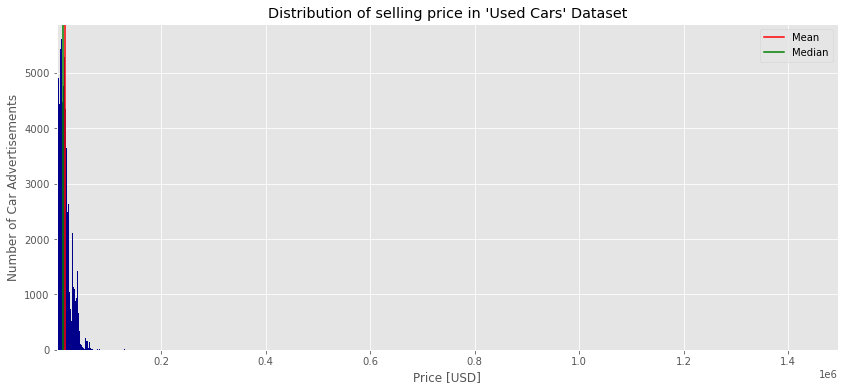

In [93]:
# Plot price distribution
plt.style.use("ggplot")
plt.figure(figsize = (14, 6))
plt.hist(used_cars_clean["price"], bins = "fd", color = "darkblue")

plt.title("Distribution of selling price in 'Used Cars' Dataset")
plt.xlabel("Price [USD]")
plt.ylabel("Number of Car Advertisements")
plt.margins(x = 0)

mean_price = used_cars_clean["price"].mean()
median_price = used_cars_clean["price"].median()
#typical_price = used_cars_clean["price"].mode()

plt.axvline(mean_price, c = "r", label = "Mean")
plt.axvline(median_price, c = "g", label = "Median")
#plt.axvline(typical_price, c = "y", label = "Mode")

plt.legend()
plt.show()

There are a tiny number of cars costing more than 150 000.00 USD. This dibalance was revealed earlier. Therefore, it is better to see how many vehicles are offered for more than 150 000.00 dollars. 

An attempt to plot the "mode" returns the following error: "*ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().*" A search on the internet found that some people suggest plotting the figure [without outliers](https://www.programmersought.com/article/2351868871/). Nonetheless, a change in the code calculating and displaying "mode" didn't produce the expected line on the graph. Therefore, it is not visible neither above nor on the plots below.

In [94]:
used_cars_clean.loc[used_cars_clean["price"] >= 150000]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7192116434,1495000.0,2014.0,lexus,like new,gas,79577.0,clean,automatic,sedan,tx,26.0349,-97.5569
7193932258,250000.0,1941.0,lincoln,excellent,gas,38.0,clean,manual,sedan,fl,45.7162,-122.6900
7194651437,189500.0,2017.0,mercedes-benz,unknown,gas,24450.0,clean,automatic,SUV,ny,25.8271,-80.2415
7184925702,239500.0,2018.0,ferrari,unknown,gas,7846.0,salvage,automatic,convertible,or,25.8271,-80.2415
7189189038,198900.0,2020.0,audi,unknown,gas,320.0,clean,automatic,coupe,or,45.5154,-122.4200
7194646958,189500.0,2017.0,mercedes-benz,unknown,gas,24450.0,clean,automatic,SUV,fl,25.8271,-80.2415
7194066510,198900.0,2020.0,audi,unknown,gas,320.0,clean,automatic,coupe,or,45.5154,-122.4200
7180863340,150000.0,2016.0,ram,like new,gas,15080.0,clean,automatic,pickup,ma,42.1251,-72.7495
7188880946,180000.0,1969.0,ferrari,excellent,gas,60000.0,clean,manual,coupe,az,34.8185,-112.9580


In [95]:
# Count entries with values above 150 000.00 USD
len(used_cars_clean.loc[used_cars_clean["price"] >= 150000])

46

In [96]:
# Calculate and print share of expensive cars
print("Share of expensive cars: {}".format(len(used_cars_clean.loc[used_cars_clean["price"] >= 150000]) / len(used_cars_clean)))

Share of expensive cars: 0.0002434725537624449


Expensive cars amount to less than 0.02%. Although there are sufficient reasons one to believe that a Mercedes produced in 2020 deserves 200 000.00 USD, or a slightly older Ferrari costs 165 000.00 USD, it is better these cars either to be removed from the list, or to be considered "outliers". Since these figures do not seem wrong, a better choice is to keep them in the list and to be processed as "outliers" later. Cars costing less than 150 000.00 USD are stored in a new variable (`cheaper_cars`). The latter is used for displaying their price distribution. The code lines that execute and visualize these operations follow below.

In [97]:
cheaper_cars = used_cars_clean.loc[used_cars_clean["price"] <= 150000]

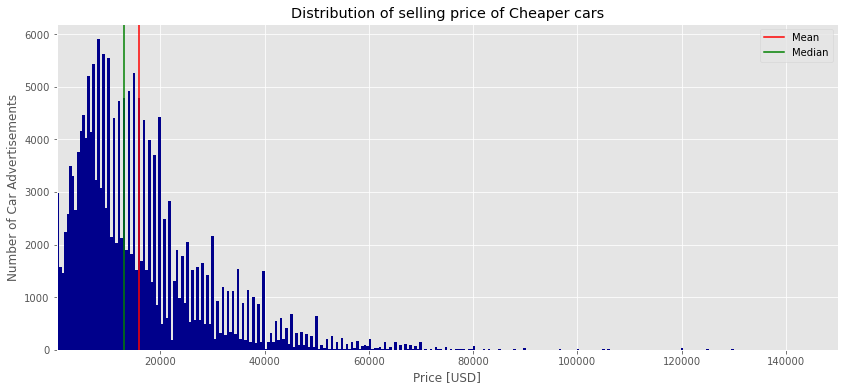

In [98]:
# Plot price distribution of cheaper cars
plt.style.use("ggplot")
plt.figure(figsize = (14, 6))
plt.hist(cheaper_cars["price"], bins = "fd", color = "darkblue")

plt.title("Distribution of selling price of Cheaper cars")
plt.xlabel("Price [USD]")
plt.ylabel("Number of Car Advertisements")
plt.margins(x = 0)

mean_price = cheaper_cars["price"].mean()
median_price = cheaper_cars["price"].median()
#typical_price = cheaper_cars["price"].mode()

plt.axvline(mean_price, c = "r", label = "Mean")
plt.axvline(median_price, c = "g", label = "Median")
#plt.axvline(typical_price, c = "y", label = "Mode")

plt.legend()
plt.show()

Price distribution of cheaper cars is better visualized now. Most cars are offered for up to 4 000.00 USD. The figure above shows that vehicle prices are distributed asymmetrically. Skewness is positive, i.e. the tail on the right side of the distribution is longer. The mean and median should be greater than the mode, i.e. the mode should be before the green line ("median").

#### 3.3.2. Explore and visualize YEAR

The work proceeds with checking the oldest and the newest cars offered on the market. Calculating "mean" and "standard deviation" will not provide usefull informatiom about data in this column.

In [99]:
print("Oldest car, year of manufacturing: {}".format(used_cars_clean.year.min()))
print("Newest car, year of manufacturing: {}".format(used_cars_clean.year.max()))

Oldest car, year of manufacturing: 1911.0
Newest car, year of manufacturing: 2021.0


The oldest car is manufactured in 1911, and the newest one - in 2021. The latter suggests that people offer cars which will be produced next year, will buy them and will drive them a bit (except the vehicles which odometer is expected to reach 170 000.00 or 800 000.00 miles). The cars produced and planned for resale in 2021 is checked below.

In [100]:
used_cars_clean.loc[used_cars_clean["year"] == 2021.0]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7194162420,22680.0,2021.0,hyundai,unknown,gas,8.0,clean,automatic,SUV,fl,26.2280,-81.7660
7180860200,45000.0,2021.0,hyundai,new,gas,645.0,clean,automatic,SUV,tn,36.3106,-83.5937
7185952544,68875.0,2021.0,gmc,new,gas,20.0,clean,automatic,SUV,or,44.5846,-123.2510
7184475551,3500.0,2021.0,ford,good,gas,170000.0,clean,automatic,SUV,or,42.3363,-122.8400
7193253347,23732.0,2021.0,chevrolet,unknown,gas,2.0,clean,automatic,SUV,mi,44.2671,-85.2194
7192969389,23502.0,2021.0,chevrolet,unknown,gas,100.0,clean,automatic,SUV,mi,44.2671,-85.2194
7192624038,34992.0,2021.0,chevrolet,unknown,gas,2.0,clean,automatic,truck,mi,44.2671,-85.2194
7194260324,29999.0,2021.0,ford,good,gas,658.0,rebuilt,automatic,truck,oh,41.5749,-83.9513
7192279178,24931.0,2021.0,chevrolet,good,gas,55.0,clean,automatic,other,nc,35.4258,-77.9838


Only 14 cars are planned to be purchased and resold in 2021. It is better to keep them in the list although removing them most likely will not affect distribution of other variables. Perhaps there are people who need a car for a certain period of time and who can afford a new one. Thereafter, when they finish the task and do not need the vehicle anymore, they resell it.

It is interesting to see how manufacturing years are distributed over time.

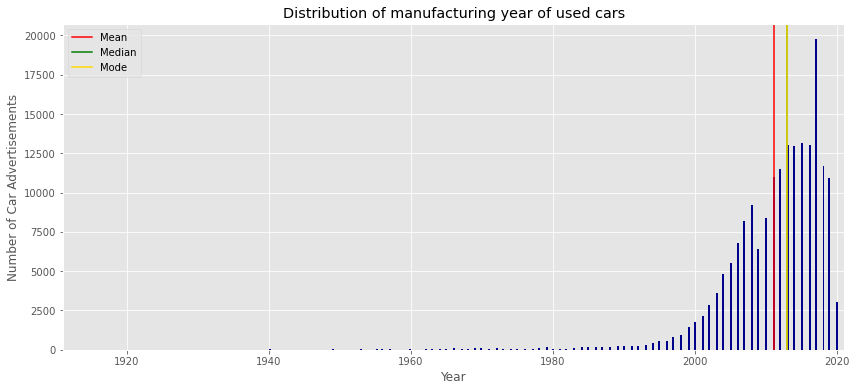

In [101]:
# Plot year of manufacturing distribution
plt.style.use("ggplot")
plt.figure(figsize = (14, 6))
plt.hist(used_cars_clean["year"], bins = "fd", color = "darkblue")

plt.title("Distribution of manufacturing year of used cars")
plt.xlabel("Year")
plt.ylabel("Number of Car Advertisements")
plt.margins(x = 0)

mean_year = used_cars_clean["year"].mean()
median_year = used_cars_clean["year"].median()
typical_year = used_cars_clean["year"].mode()

plt.axvline(mean_year, c = "r", label = "Mean")
plt.axvline(median_year, c = "g", label = "Median")
plt.axvline(median_year, c = "gold", label = "Mode")

plt.legend()
plt.show()

Most used cars are manufactured after 1990. This variable is distributed asymmetically, too. However, this time skewness is negative, i.e. the tail on the left side of the distribution is longer. The mean and median should be less than the mode, i.e. the mode is on the right of the red line ("mean"). It is not quite clear why the "median" is not displayed having in mind that the code does not return an error for it.

#### 3.3.3. Explore and visualize MANUFACTURER

Values in "manufacturer" are categories and standard statistics does not apply in this case. Perhaps, analysis should be based only on plotting observations for each category. Prior to that, however, `groupby()` is applied to compute numbers for each category. The code lines making the new variable and displaying the bar plot are given below.

In [102]:
cars_manufacturers = used_cars_clean.groupby("manufacturer").size().sort_values(ascending = True)

In [103]:
cars_manufacturers

manufacturer
morgan                 1
porche                 1
hennessey              1
land rover             9
aston-martin          25
datsun                28
harley-davidson       37
ferrari               43
alfa-romeo            75
tesla                221
fiat                 356
jaguar               434
saturn               616
mercury              749
rover                822
mini                 876
pontiac             1158
mitsubishi          1170
volvo               1254
infiniti            1413
lincoln             1441
acura               1795
audi                2169
lexus               2544
mazda               2561
buick               2688
cadillac            2860
chrysler            3365
mercedes-benz       4221
kia                 4396
volkswagen          4701
bmw                 5100
subaru              5197
hyundai             5539
ram                 6958
dodge               7025
gmc                 7626
jeep                8696
nissan             10963
honda       

Visualizing computations are stored in a function (`plot_observations()`) since these are going to be repeated several times, for all categorical columns.

In [104]:
# Define function for plotting observations
def plot_observations(single_variable, title = None, xlabel = None):
    """
    Function: computes and visualizes observations for a given variable (column).
    
    Parameters: a pandas Series; optional: title and xlabel.
    
    Returns: displays a bar plot.
    """
    
    plt.style.use("ggplot")
    plt.figure(figsize = (14, 6))

    plt.bar(single_variable.index, single_variable, color = "darkblue")

    if title is not None:
        plt.title(title)
    if xlabel is not None:
        plt.xlabel(xlabel)

    plt.ylabel("Number of Car Advertisements")
    plt.margins(x = 0)

    plt.xticks(fontsize = 14, rotation = 90)

    plt.show()

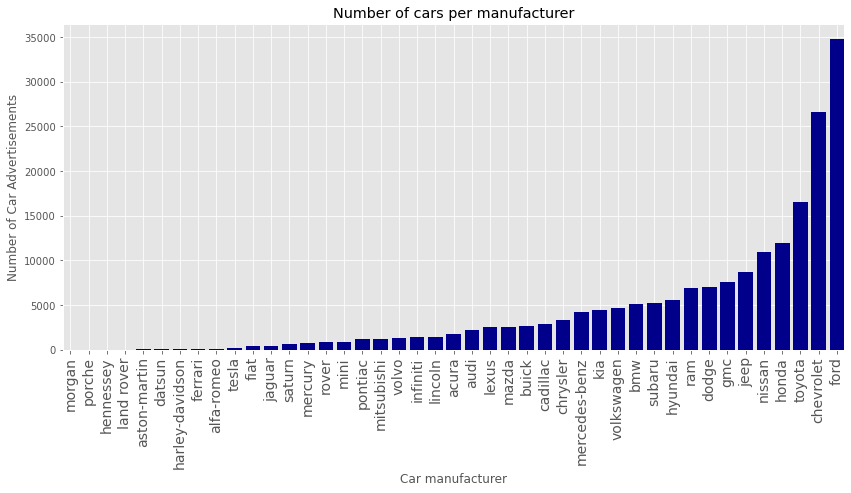

In [105]:
plot_observations(cars_manufacturers, "Number of cars per manufacturer", "Car manufacturer")

Many vehicles are produced by "Ford", "Chevrolet", and "Toyota". All these have more than 15 000 used cars for sale. "Honda", Nissan", and "Jeep" are represented by around 100 000 vehicles. The remaining cars are produced by other manufactures. A minor share is offered by "Alfa Romeo", "Ferrari", "Harley Davidson", "Datsun", "Aston Martin", "Land Rover", "Hennessey",  "Porche", and "Morgan".

#### 3.3.4. Explore and visualize CONDITION

Values in "condition" are categorical, too. This means that standard ststistics could not be applied. Instead, the only possible exploratory tool is visualizing the number of cars in each condition type. The steps below display the data on a bar plot.

In [106]:
cars_condition = used_cars_clean.groupby("condition").size().sort_values()

In [107]:
cars_condition

condition
salvage        266
new            504
fair          3832
like new     10970
good         46859
excellent    55541
unknown      70961
dtype: int64

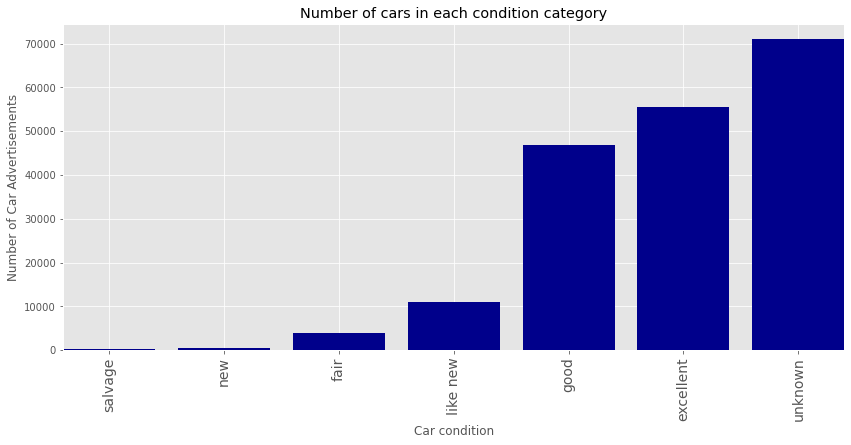

In [108]:
plot_observations(cars_condition, "Number of cars in each condition category", "Car condition")

Unfortunately, many cars are with unknown condition. More than 50 000 are in excellent, and another 47 000 are in good state. Around 10 000 vehicles are defined "like new". Negligible number of cars are announced in "fair", "new", and "salvage" condition.

#### 3.3.5. Explore and Visualize FUEL

Fuel type is entered as category, i.e. "gas", "diesel", etc. The latter means that regular statistics does not apply here, too. Instead, number of cars per fuel type is displayed on a bar chart below. Prior to that, however, a new variable holding cars number per fuel type is created.

In [109]:
cars_fuel_type = used_cars_clean.groupby("fuel").size().sort_values()

In [110]:
cars_fuel_type

fuel
electric       594
hybrid        2467
other         6990
diesel       11018
gas         167864
dtype: int64

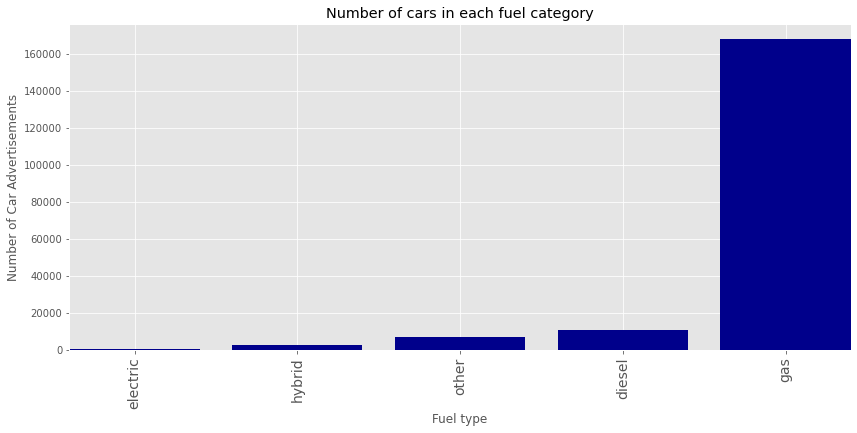

In [111]:
plot_observations(cars_fuel_type, "Number of cars in each fuel category", "Fuel type")

Most cars are ignited by gas. It should be noted here that the word "gas" or "gasoline" in the [United States](https://en.wikipedia.org/wiki/Gasoline) equals "petrol" in other parts of the world, Europe including. The remaining vehicles use "diesel" (slightly more than 11 000), or another fuel type (less than 7 000), or are hybrid meaning that their engines are ignited both by liquid fuels and by electricity. A negligible number of cars (less than 600) are electric.

#### 3.3.6. Explore and Visualize ODOMETER

Relevant statistics is minimum and maximum travelled distance. Mean, median, and mode are not of much help save to display them on a plot.

In [112]:
print("Minimum travelled distance: {}".format(used_cars_clean.odometer.min()))
print("Maximum travelled distance: {}".format(used_cars_clean.odometer.max()))

Minimum travelled distance: 0.0
Maximum travelled distance: 10000000.0


The values above suggest that a used car is sold without being really used (if odometer was not manipulated), and others travelled a lot - the highest value is ten million miles. It will be interesting to see how many vehicles made this distance. The code executing this check follows below. 

In [113]:
used_cars_clean.loc[used_cars_clean["odometer"] >= 1000000.0]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7195096726,19500.0,1967.0,chevrolet,good,gas,1000000.0,clean,automatic,truck,dc,39.1164,-77.7802
7184092588,1700.0,1997.0,chevrolet,fair,gas,2564237.0,clean,automatic,truck,mn,44.1727,-94.0087
7194379989,3500.0,1999.0,mazda,good,gas,1495000.0,clean,manual,convertible,nm,35.3240,-106.7100
7194887258,7600.0,1996.0,ford,excellent,diesel,2004000.0,clean,automatic,truck,dc,38.7492,-77.4878
7194131504,6900.0,2012.0,honda,good,gas,1430000.0,clean,automatic,sedan,dc,39.0095,-76.9846
...,...,...,...,...,...,...,...,...,...,...,...,...
7195110487,3500.0,2005.0,jeep,fair,gas,1450000.0,clean,automatic,SUV,nj,39.9771,-74.1565
7182132250,4400.0,2008.0,mazda,excellent,gas,1517000.0,clean,automatic,SUV,fl,26.9827,-82.1412
7185800630,5000.0,2004.0,ford,good,diesel,2112785.0,clean,automatic,pickup,ga,34.4844,-85.3360


One hundred and fourty vehicles hovered 1 000 000 miles or more. It is better to keep these cars in the list since it might be reasonable to assume that they really reached this distance.

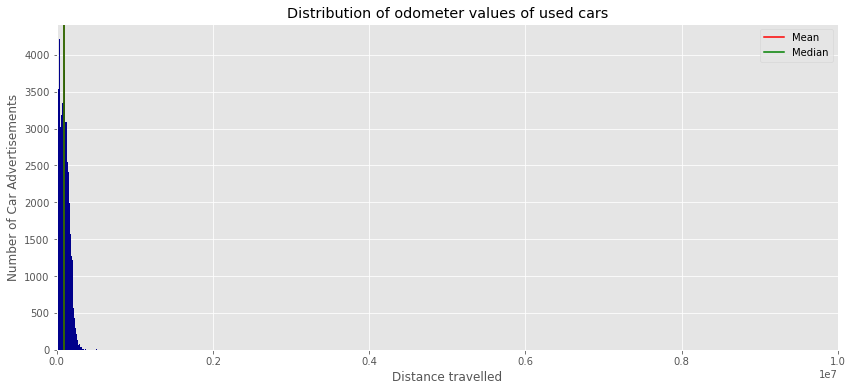

In [114]:
# Plot distribution of travelled distance
plt.style.use("ggplot")
plt.figure(figsize = (14, 6))
plt.hist(used_cars_clean["odometer"], bins = "fd", color = "darkblue")

plt.title("Distribution of odometer values of used cars")
plt.xlabel("Distance travelled")
plt.ylabel("Number of Car Advertisements")
plt.margins(x = 0)

mean_odometer = used_cars_clean["odometer"].mean()
median_odometer = used_cars_clean["odometer"].median()
#typical_odometer = used_cars_clean["odometer"].mode()

plt.axvline(mean_odometer, c = "r", label = "Mean")
plt.axvline(median_odometer, c = "g", label = "Median")
#plt.axvline(typical_odometer, c = "gold", label = "Mode")

plt.legend()
plt.show()

The "mode" line does not work here, too. Cars travelled more than 1 000 000 miles are removed for displaying a better histogram. The remaining are stored in a variable `newer_cars`. Thereafter, distribution is checked again.

In [115]:
newer_cars = used_cars_clean.loc[used_cars_clean["odometer"] <= 1000000]

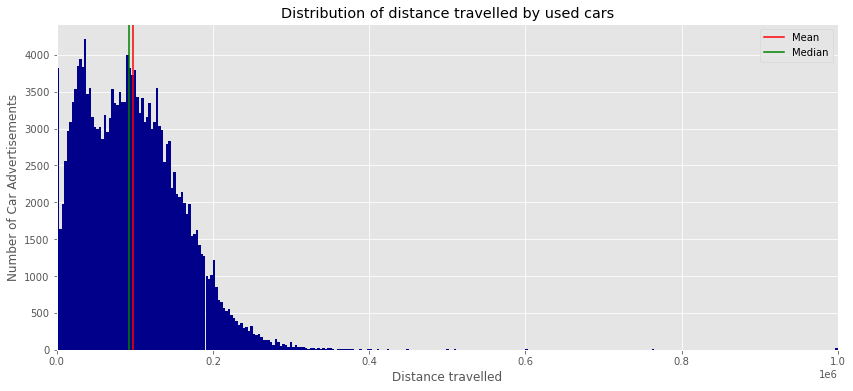

In [116]:
# Plot distribution of newer cars
plt.style.use("ggplot")
plt.figure(figsize = (14, 6))
plt.hist(newer_cars["odometer"], bins = "fd", color = "darkblue")

plt.title("Distribution of distance travelled by used cars")
plt.xlabel("Distance travelled")
plt.ylabel("Number of Car Advertisements")
plt.margins(x = 0)

mean_odometer = newer_cars["odometer"].mean()
median_odometer = newer_cars["odometer"].median()
#typical_odometer = newer_cars["odometer"].mode()

plt.axvline(mean_odometer, c = "r", label = "Mean")
plt.axvline(median_odometer, c = "g", label = "Median")
#plt.axvline(typical_odometer, c = "gold", label = "Mode")

plt.legend()
plt.show()

Much better. Most cars travelled up to 300 000 miles. The figure above indicates that distances are distributed asymmetrically. Skewness is positive (similarly to the "price" variable), i.e. the tail on the right side of the distribution is longer. The "mean" and "median" are greater than the "mode", i.e. the "mode" should be before the green line ("median"). Unfortunately, the code line that should calculate and display the "mode" produced the same error as above. This time distribution is bimodal - two peaks are observed on the graph.

#### 3.3.7. Explore and Visualize TITLE_STATUS

Values in "title status" are categorical, i.e. "clean", "rebuilt", etc. The latter means that regular statistics does not apply here, too. Instead, number of cars per title status is displayed on a bar chart (as earlier for condition and fuel type). Prior to that, however, a new variable for cars number is created.

In [117]:
cars_title_status = used_cars_clean.groupby("title_status").size().sort_values()

In [118]:
cars_title_status

title_status
parts only        37
missing          121
lien            1238
salvage         1735
rebuilt         3701
clean         182101
dtype: int64

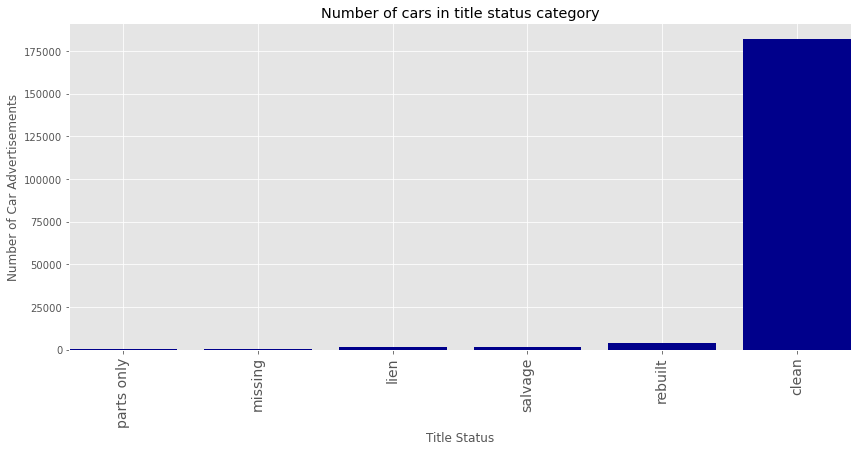

In [119]:
plot_observations(cars_title_status, "Number of cars in title status category", "Title Status")

Most vehicles have "clean" title status. Some (3 700) are rebult. Insignificant number are categorised as "salvage", "lien" (a kind of [insurance](https://www.caranddriver.com/research/a32780340/what-is-the-meaning-of-lien-title/) if the car is bought with a bank loan), with "missing" status (i.e. its title status cannot be defined), and "parts only". The latter means that the "title is issued to a vehicle that the insurance company has declared a total loss due to fire, vandalism, collision, theft, flood, or other occurrence and that the insurance company has declared to be “parts only.” This type of vehicle [can never be rebuilt or registered in the Commonwealth and may never be legally driven."](https://www.coursehero.com/file/p443s2n9/Parts-Only-Title-A-parts-only-title-is-issued-to-a-vehicle-that-the-insurance/).

#### 3.3.8. Explore and Visualize TRANSMISSION

Cars' gears are placed into three categories, thus regular statistics is not applicable again. Instead, data are grouped around each transmission type and counted. Thereafter, all groups are visualised on a bar plot.

In [120]:
cars_transmission = used_cars_clean.groupby("transmission").size().sort_values()

In [121]:
cars_transmission

transmission
other          8764
manual        11043
automatic    169126
dtype: int64

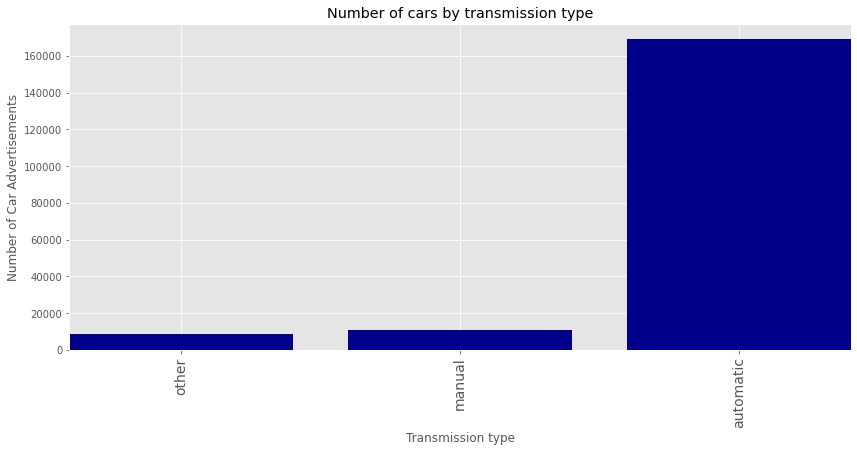

In [122]:
plot_observations(cars_transmission, "Number of cars by transmission type", "Transmission type")

Most cars are authomatic. Slightly more than 10 000 are with manual gears. Around 9 000 vehicles' transmission is of another type, most likely some mixed form between authomatic and manual gearbox. Transmission types are well explained [here](https://www.autodeal.com.ph/articles/car-features/here-are-different-types-automatic-transmissions).

#### 3.3.9. Explore and Visualize TYPE

Vehicles' type is categorised in several groups, which means that regular stratistics does not apply here, too. Instead, data are plotted on a bar chart showing the number of cars in each type. Prior to that, data on cars' type and their number in each category is stored in a new variable.

In [123]:
cars_type = used_cars_clean.groupby("type").size().sort_values()

In [124]:
cars_type

type
bus              180
offroad          336
convertible     4066
mini-van        4243
van             5866
wagon           7004
hatchback       7719
other           9133
coupe           9563
truck          19131
pickup         19896
SUV            50018
sedan          51778
dtype: int64

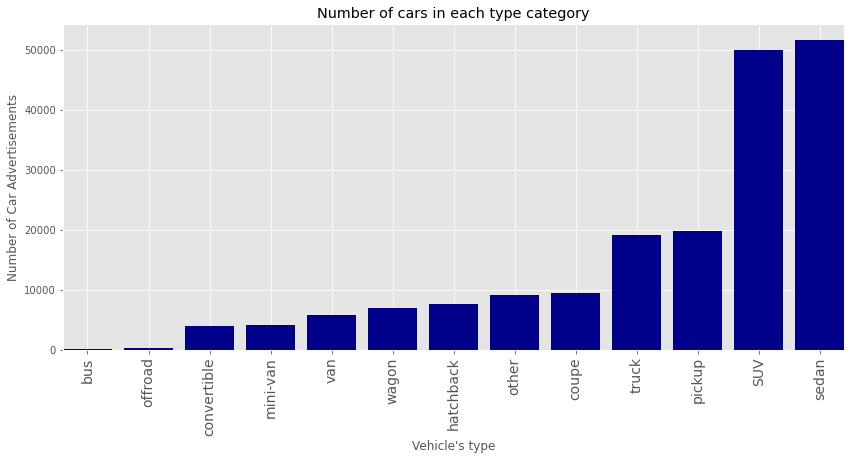

In [125]:
plot_observations(cars_type, "Number of cars in each type category", "Vehicle's type")

Around 50 000 offers are for SUVs and for Sedans. Slightly less than 20 000 are for Pickups and for Trucks. Ads for other types (e.g. Coupe, Hatchback, Wagon, Van, Mini-van, Convertible, Offroad, and Bus) amount to less than 10 000 per category.

#### 3.3.10. Explore and Visualize STATE

"State" provides information about the place where a vehicle is located. A state's name is entered as string, hence regular statistics could not be applied here, too. Instead, the number of cars per state are visualized below. To that end, a new variable stores cars' numbers per state.

In [126]:
cars_per_state = used_cars_clean.groupby("state").size().sort_values()

In [127]:
cars_per_state

state
nd      293
wv      308
de      365
wy      417
ms      536
ut      589
sd      663
ne      687
hi      925
me     1109
la     1130
dc     1163
ri     1339
vt     1354
nh     1472
nv     1474
ar     1623
nm     1750
ga     1927
mo     2137
al     2365
ok     2408
sc     2420
ks     2535
md     2572
ct     2704
az     2748
ky     2753
ak     2808
in     3075
mn     3182
il     3679
ma     3683
mt     3992
nj     4379
ia     5026
tn     5130
id     5405
co     5481
va     5514
wi     6077
nc     6244
mi     6473
pa     6514
or     7127
wa     7238
ny     8331
tx     8645
oh     9028
fl    12933
ca    17203
dtype: int64

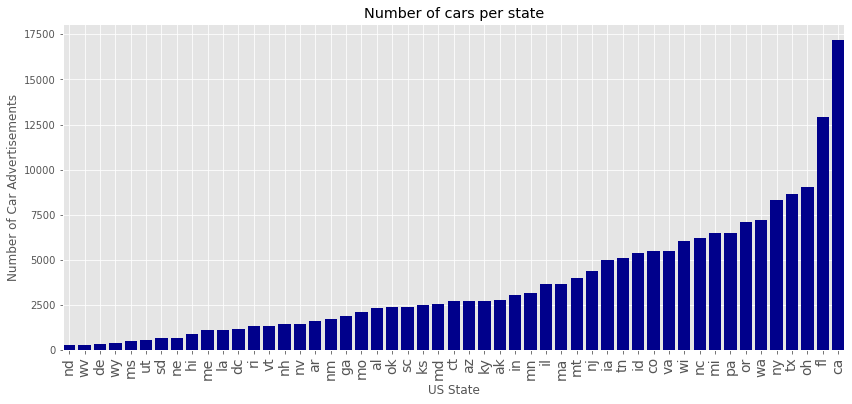

In [128]:
plot_observations(cars_per_state, "Number of cars per state", "US State")

The greatest number of offers come from California, followed by Florida. Many vehicles are advertised in Ohio, Texas, and New York. The remaining states are represented by less than 7500 vehicles each.

#### 3.3.11. Explore GEOGRAPHICAL LOCATION

Several attempts were made to plot longitude and latitude data on a USA map. `BaseMap` couldn't be loaded, and `Cartopy` returned errors and caused various problems. For this reason, each car's location was not displayed.

## 4. Testing hypothesis and modelling

This Chapter is devoted to testing the two hypotheses and to finding the models that best describe available and predict unknown data. The work is organised as follows: preprocessing data; searching for the right algorithm; and model selection. Almost all steps, including fine-tuning of hyperparameters and underperforming models are kept in the file.

Prior to that, however, correlation between numerical columns is explored before data being transformed. To that end all non-categorical columns (except "price", which is a target variable for testing the first hypothesis) are stored in a new variable `used_cars_numerical`.

In [129]:
used_cars_numerical = used_cars_clean[["year", "odometer", "lat", "long"]]

In [130]:
used_cars_numerical.head()

,year,odometer,lat,long
id,,,,
7184712241,2007.0,254217.0,45.6836,-92.9648
7184711787,2012.0,188406.0,45.6836,-92.9648
7184710887,2010.0,108124.0,45.6836,-92.9648
7184710023,2011.0,178054.0,45.6836,-92.9648
7184709156,2014.0,170259.0,45.6836,-92.9648


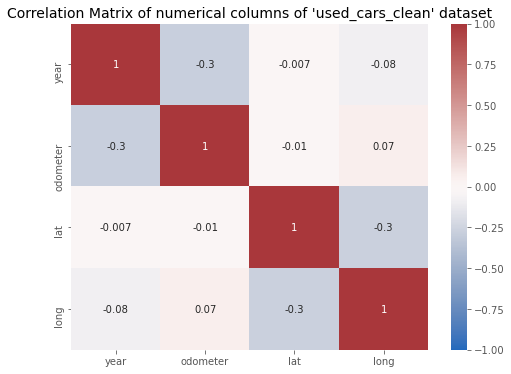

In [131]:
# Plot correlation between numerical columns
plt.figure(figsize = (8, 6))
sns.heatmap(used_cars_numerical.corr(), 
            annot = True, 
            fmt = ".1g", 
            vmin = -1, 
            vmax = 1, 
            center = 0, 
            cmap = "vlag")

plt.title("Correlation Matrix of numerical columns of 'used_cars_clean' dataset", fontsize = 14)

plt.show()

As a whole, there is no correlation between numerical variables. A very weak positive link exists between "odometer" and "longitude", meaning that cars travelled a longer distance could be found in the western part of USA. Similarly, a weak negative correlation (-0.3) is found in "longitude" and "latitude", i.e. a change in "longitude" leads to a change in the "latitude", in the opposite direction. 

### 4.1. Testing hypothesis No. 1 with Regression.
### Is a car's price a function of its characteristics (e.g. model, year of manufacturing, selling location, etc.)?

The first hypothesis is tested with Regression. Regression a "supervised learning" algorithm, i.e. it receives training data in the form of independent variable(s) (attributes) and a dependent variable (target). It "learns" the attributes and corresponding targets. The model is tested on other attributes, unseen before. Then, predicted and testing targets are compared. The best model is the one with the smallest difference between predicted and real data. Regression draws a line (straight or not) between points in space (values in a matrix). This line tries to be close to each point as possible. In this particular exercise, Regression will try to find the line that is close enough to each price, without being too close and without passing through a point.

Doing Regression requires completing several preliminary steps. The first one is to separate the dataset into “attributes” and “target” (price) variables. Thereafter, all columns should be converted into numerical. This is performed by pandas `get_dummies()` function for all non-numerical (categorical) variables. `LabelEncoder()` of sklearn is not appropriate in this particular case, since it will assign value to each category. However, Regression algorithms might regard these points in space as lying at an equal distance one from another, which would be wrong. Pandas `get_dummies()` makes each category to have its own column, thus algorithms won’t get confused. 

#### 4.1.1. Separate attributes and target

In [132]:
# Get attributes in a new variable
used_cars_att = used_cars_clean.drop("price", axis = 1)

In [133]:
used_cars_att.head()

,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,
7184712241,2007.0,gmc,good,diesel,254217.0,clean,automatic,truck,mn,45.6836,-92.9648
7184711787,2012.0,ford,good,gas,188406.0,clean,automatic,truck,mn,45.6836,-92.9648
7184710887,2010.0,chevrolet,good,gas,108124.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184710023,2011.0,chevrolet,good,gas,178054.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184709156,2014.0,ford,good,gas,170259.0,clean,automatic,SUV,mn,45.6836,-92.9648


In [134]:
# Get price in a separate variable
used_cars_price = used_cars_clean["price"]

In [135]:
used_cars_price.head()

id
7184712241    16995.0
7184711787    13995.0
7184710887     7995.0
7184710023     8995.0
7184709156    10995.0
Name: price, dtype: float64

Both attributes and target columns are stored in separate variables now. Preprocessing work proceeds with converting category features into dummies.

#### 4.1.2. Preprocessing for Regression

#### Covert categoriacal variables into numerical

Category variables were identified and checked during "data cleaning" and "data exploring" stages above. Therefore, they are not checked here again. Hence, `get_dummies()` function is directly applied to all columns with categorical values.

In [136]:
used_cars_attributes = pd.get_dummies(used_cars_att, columns = ["manufacturer", "condition", "fuel", "title_status",
                                                               "transmission", "type", "state"])

In [137]:
used_cars_attributes.head()

,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
id,,,,,,,,,,,,,,,,,,,,,
7184712241,2007.0,254217.0,45.6836,-92.9648,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7184711787,2012.0,188406.0,45.6836,-92.9648,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7184710887,2010.0,108124.0,45.6836,-92.9648,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7184710023,2011.0,178054.0,45.6836,-92.9648,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7184709156,2014.0,170259.0,45.6836,-92.9648,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
used_cars_attributes.shape

(188933, 132)

Attributes amount to 132 after conversion (not all features are displayed above). Their type is checked with `info()` function.

In [139]:
used_cars_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188933 entries, 7184712241 to 7195109037
Columns: 132 entries, year to state_wy
dtypes: float64(4), uint8(128)
memory usage: 35.3+ MB


This "uint8" type might be a source of problems but will be dealt with later.

#### Identify and remove Outliers with `RANSAC`

RANSAC (RANdom SAmple Consensus) algorithm identifies outliers, i.e. points which are quite away from remaining data (in general, points that do not fit the model). It should be noted here that RANSAC is not a Machine Learning algorithm. It could be fine-tuned through chosing `base_estimator` and if necessary - some other hyperparameters. If `base_estimator` is “None”, then `LinearRegression()` is used for floating-point target values. “Minimum number of samples” equals the randomly chosen samples from original data. The next possible hyperparameter is “Maximum number of iterations” for random sample selection, i.e. the numbers of iterations made for choosing random samples. “Residual_threshold” indicates the maximum residual for a data sample to be classified as an inlier. By default, the threshold is chosen as MAD (median absolute deviation) of the target values `y`. “Random_state”, regardless of its value, guarantees reproducibility of results.

The first attempt to identify outliers is made with minimum 50 samples.

##### Mimimum samples = 50

The first step is to initialize RANSAC. It receives `LinearRegression()` as a `base_estimator`; it should choose at least 50 samples and should make maximum 100 trials. `Residual_threshold` is set to 0.5. `Random_state` guarantees reproducibility of results.

In [140]:
ransac = RANSACRegressor(LinearRegression(), min_samples = 50, max_trials = 100, 
                         residual_threshold = 0.5, random_state = 35)

# Fit data to Ransac 
ransac.fit(used_cars_attributes, used_cars_price)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=35, residual_threshold=0.5)

In [141]:
# Score RANSAC
ransac.score(used_cars_attributes, used_cars_price)

-0.5520494516103753

In [142]:
# Calculate ratio between  sum of inliers and length of the cleaned dataset
ransac.inlier_mask_.sum() / len(used_cars_clean)

0.0008574468197720885

Most points are classified as inliers. The `inlier_mask_` attribute displays outliers with a boolen variable `False`. 

The code lines below identify inliers taking into account the outliers found above. Then, the algorithm is scored for inliers. The outcome suggests that all outliers are indentified.

In [143]:
# Calculate inlier attributes
inlier_attributes1 = used_cars_attributes[ransac.inlier_mask_]

# Calculate inlier targets
inlier_targets1 = used_cars_price[ransac.inlier_mask_]

# Calculate performance of RANSAC over inliers
ransac.score(inlier_attributes1, inlier_targets1)

1.0

The same computations are performed for outliers.

In [144]:
# Calculate outlier attributes
outlier_attributes1 = used_cars_attributes[~ ransac.inlier_mask_]

# Calculate outlier attributes
outlier_targets1 = used_cars_price[~ ransac.inlier_mask_]

# Calculate performance of RANSAC over outliers
ransac.score(outlier_attributes1, outlier_targets1)

-0.5531266921523794

It would be interesting to see where these outliers are. To that end a plotting function is composed below.

In [145]:
# Create a function to plot outliers
def plot_outliers(attributes_inliers, targets_inliers, attributes_outliers, targets_outliers, title = None):
    """
    Function: computes and displays outliers in a dataset.
    
    Parameters: both inliers and outliers for attributes and taget.
    
    Returns: outliers on a scatterplot.
    """
    plt.figure(figsize = (12, 7))
    plt.scatter(attributes_inliers.year, targets_inliers)
    plt.scatter(attributes_outliers.year, targets_outliers, color = "darkblue")

    if title is not None:
        plt.title(title)
    
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.axhline(y = 400000, color = "red")

    plt.show()

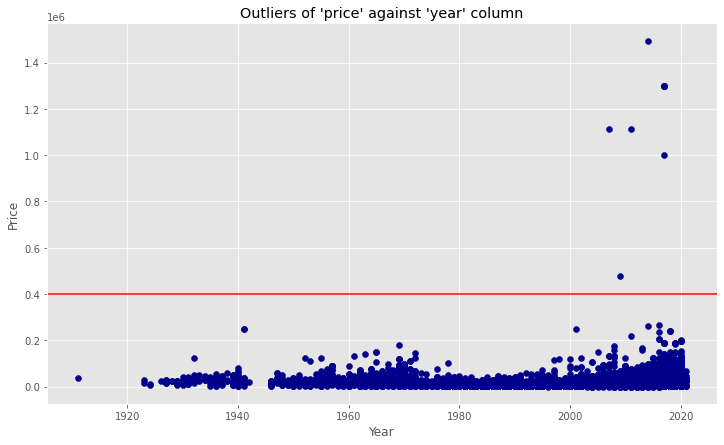

In [146]:
# Plot outliers with min 50 samples
plot_outliers(inlier_attributes1, inlier_targets1, outlier_attributes1, outlier_targets1, "Outliers of 'price' against 'year' column")

Outliers are the cars costing more than 400 000.00 USD. It would be interesting to see dispersion with a doubled minimum samples. To that end, the above operations are performed again with minimum samples (= 100) being the only change.

##### Mimimum samples = 100

In [147]:
# Initializing Ransac with Linear Regression with the given hyperparameters
ransac = RANSACRegressor(LinearRegression(), min_samples = 100, max_trials = 100, 
                         residual_threshold = 5.0, random_state = 35)

In [148]:
# Fit data to Ransac algorithm
ransac.fit(used_cars_attributes, used_cars_price)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=100,
                random_state=35, residual_threshold=5.0)

In [149]:
# Scoring performance of RANSAC
ransac.score(used_cars_attributes, used_cars_price)

0.15406164010866552

In [150]:
# Calculate ratio between sum of inliers and length of the cleaned dataset
ransac.inlier_mask_.sum() / len(used_cars_clean)

0.00086273970137562

In [151]:
# Calculate inlier attributes
inlier_attributes2 = used_cars_attributes[ransac.inlier_mask_]

# Calculate inlier targets
inlier_targets2 = used_cars_price[ransac.inlier_mask_]

# Calculate performance of RANSAC over inliers
ransac.score(inlier_attributes2, inlier_targets2)

0.9999999931397775

In [152]:
# Calculate outlier attributes
outlier_attributes2 = used_cars_attributes[~ ransac.inlier_mask_]

# Calculate outlier targets
outlier_targets2 = used_cars_price[~ ransac.inlier_mask_]

# Calculate performance of RANSAC over outliers
ransac.score(outlier_attributes2, outlier_targets2)

0.15387995760263906

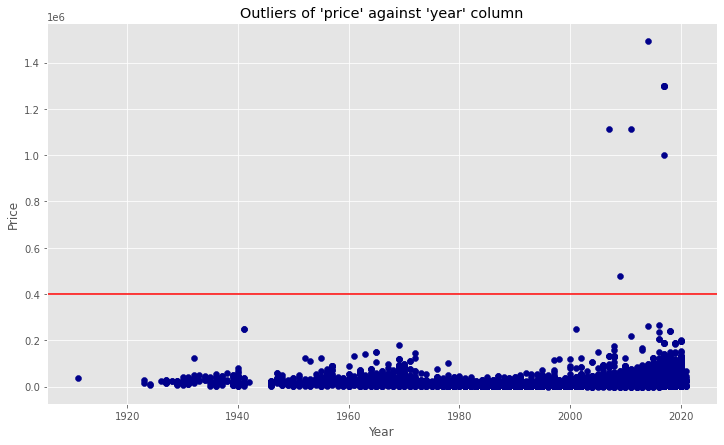

In [153]:
# Plot outliers with minimum samples = 100
plot_outliers(inlier_attributes2, inlier_targets2, outlier_attributes2, outlier_targets2, "Outliers of 'price' against 'year' column")

100 samples return similar results. Therefore, outliers are removed since they may affect model's training and predicting capability.

#### Remove OUTLIERS

All cars amounting to more than 400 000.00 USD are displayed below.

In [154]:
used_cars_clean.loc[used_cars_clean["price"] >= 400000]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7192116434,1495000.0,2014.0,lexus,like new,gas,79577.0,clean,automatic,sedan,tx,26.0349,-97.5569
7193548951,1299700.0,2017.0,chevrolet,unknown,gas,129409.0,clean,automatic,SUV,in,42.8395,-85.5297
7194770843,1111111.0,2011.0,nissan,excellent,gas,90000.0,clean,automatic,sedan,tx,29.4666,-98.5673
7185849951,999000.0,2017.0,mercedes-benz,unknown,gas,4085.0,clean,automatic,SUV,fl,26.1579,-81.7665
7193621592,479500.0,2009.0,chrysler,like new,gas,64950.0,clean,automatic,wagon,ca,33.6483,-117.9150
7193566291,1299700.0,2017.0,chevrolet,unknown,gas,129409.0,clean,automatic,SUV,mi,42.8395,-85.5297
7193585403,1299700.0,2017.0,chevrolet,unknown,gas,129409.0,clean,automatic,SUV,mi,42.8395,-85.5297
7193605233,1299700.0,2017.0,chevrolet,unknown,gas,129409.0,clean,automatic,SUV,mi,42.8395,-85.5297
7193620631,1299700.0,2017.0,chevrolet,unknown,gas,129409.0,clean,automatic,SUV,mi,42.8395,-85.5297


Eleven cars cost more than 400 000.00 USD. It seems one and the same car is entered 5 times: a SUV Chevrolet manufactured in 2017, with identical geo-coordinates, price and travelled distance. All 11 cars are removed from the dataset.

In [155]:
used_cars_clean = used_cars_clean.loc[used_cars_clean["price"] <= 400000]

In [156]:
used_cars_clean.loc[used_cars_clean["price"] >= 400000]

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,


All outliers are removed now. It would be good once again to check how the data looks like without them. To that end, outlier detection steps are performed again, with minimum 100 samples. Prior to that, however, attributes and target are separated for a second time.

#### Separate outlierLESS attributes and target 

In [157]:
# Get attributes
used_cars_att = used_cars_clean.drop("price", axis = 1)

# Get price
used_cars_price = used_cars_clean["price"]

In [158]:
# Make dummy columns from category variables
used_cars_attributes = pd.get_dummies(used_cars_att, columns = ["manufacturer", "condition", "fuel", "title_status",
                                                               "transmission", "type", "state"])

In [159]:
# Check dataset's shape
used_cars_attributes.shape

(188922, 132)

In [160]:
# Check columns type
used_cars_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188922 entries, 7184712241 to 7195109037
Columns: 132 entries, year to state_wy
dtypes: float64(4), uint8(128)
memory usage: 35.3+ MB


Separation was successful (188922 instead of 188933 entries).

#### Check for outliers and plot result

The work proceeds with repeating the steps for outlier detection described above.

In [161]:
# Initializing Ransac with Linear Regression with the given hyperparameters
ransac = RANSACRegressor(LinearRegression(), min_samples = 100, max_trials = 100, 
                         residual_threshold = 5.0, random_state = 35)

In [162]:
# Fit data to Ransac algorithm
ransac.fit(used_cars_attributes, used_cars_price)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=100,
                random_state=35, residual_threshold=5.0)

In [163]:
# Scoring performance of RANSAC
ransac.score(used_cars_attributes, used_cars_price)

-264.292794634625

In [164]:
# Calculate ratio between sum of inliers and length of the cleaned dataset
ransac.inlier_mask_.sum() / len(used_cars_clean)

0.0008839626935984163

In [165]:
# Calculate inlier attributes
inlier_attributes3 = used_cars_attributes[ransac.inlier_mask_]

# Calculate inlier targets
inlier_targets3 = used_cars_price[ransac.inlier_mask_]

# Calculate performance of RANSAC over inliers
ransac.score(inlier_attributes3, inlier_targets3)

0.9999999999996791

In [166]:
# Calculate outlier attributes
outlier_attributes3 = used_cars_attributes[~ ransac.inlier_mask_]

# Calculate outlier targets
outlier_targets3 = used_cars_price[~ ransac.inlier_mask_]

# Calculate performance of RANSAC over outliers
ransac.score(outlier_attributes3, outlier_targets3)

-264.41485681611584

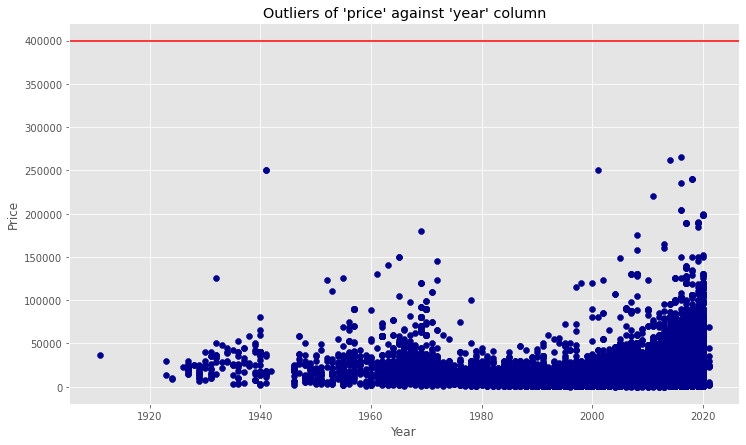

In [167]:
# Plot outliers after removing those costing more than 400 000 USD
plot_outliers(inlier_attributes3, inlier_targets3, outlier_attributes3, outlier_targets3, "Outliers of 'price' against 'year' column")

More dots look like outliers now. Perhaps, this is because price boundary was narrowed down. Nonetheless, it is quite possible new cars to exceed 150 000.00 USD and some older, vintage vehicles to be more expensive, as well.

#### Data Scaling

Data scaling is needed for making all values in each column within one and the same range (the process is known as data **normalization**). Thus, an algorithm will not assign greater weight to larger values. So, values between 50 and 10 000 will be scaled within 0 and 1. Normalization is performed by `MinMaxScaler()`. It is not a Machine Learning algorithm but a convenient tool for making all values within a given range. `StandardScaler()` is also acceptable algorithm but the former one is more understandable. The code lines that scale and prints transformed matrix follow below.

In [168]:
scaler = MinMaxScaler()

used_cars_attributes_scaled = scaler.fit_transform(used_cars_attributes)

`MinMaxScaler()` learns all columns, including their minimum and maximum values. `Transform()` makes the data it received between 0 and 1. As a result data's coefficients are normalized, i.e. each feature's value ranges between 0 and 1. **Linear Regression** is performed with these, scaled attributes. The code line below checks if normalization was successful.

In [169]:
used_cars_attributes_scaled

array([[0.87272727, 0.0254217 , 0.83593767, ..., 0.        , 0.        ,
        0.        ],
       [0.91818182, 0.0188406 , 0.83593767, ..., 0.        , 0.        ,
        0.        ],
       [0.9       , 0.0108124 , 0.83593767, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.83636364, 0.016     , 0.84618788, ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.016     , 0.84542237, ..., 0.        , 0.        ,
        0.        ],
       [0.94545455, 0.0160526 , 0.75007483, ..., 0.        , 0.        ,
        0.        ]])

It seems all initial values were turned into numbers between 0 and 1. Minimum and maximum values are checked by the following code lines:

In [170]:
print(f"Minumum values of all columns: {used_cars_attributes_scaled.min(axis = 0)}")

print(f"Maximum values of all columns: {used_cars_attributes_scaled.max(axis = 0)}")

Minumum values of all columns: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum values of all columns: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


So far so good. The next step is to model the data with Linear Regression.

#### 4.1.3. Model training and improvement

**Hypothesis No. 1** is tested with `LinearRegression()`- an algorithm designed to predict continuous values. In this case, it will try to predict a car's price taking into account relationships and dependencies of and between dataset's attributes. 

`MSE` (`RMSE`) is the metric that will show if a model is good enough or not. A good model is expected to have small MSE/RMSE and $R^2$ above 70% on the *validation set* . MSE is prefered since $R^2$ is not always the best metric. `RMSE` is the typical distance a prediction distancing itself from the real value.

A simple explanation of MSE and RMSE is provided [here](https://www.vernier.com/til/1014). According to this publication, "Mean Squared Error is a measure of how close a fitted line is to data points. [...] The squaring is done so negative values do not cancel positive values. The smaller the Mean Squared Error, the closer the fit is to the data." RMSE is explained as follows: "it is just the square root of the mean square error. [...] it has the same units as the quantity plotted on the vertical axis."

According to a publication in [Data Science Central](https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the), $R^2$ "is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination [...]." $R^2$ is defined as "the percentage of the response variable variation that is explained by a linear model", i.e. $R^2 = \frac{Explained  variation}{Total  variation}$. It is always between 0 and 100%. $R^2 = 0\%$ means that the model does not explain the variability of the response data around its mean. On the other hand, $R^2 = 100\%$ means that the model explains all variability of the response data around its mean. 

Before initializing `LinearRegression`, however, the dataset should be split into training, validation, and testing sets.

#### Split data into training, validation, and testing sets

Before spliting, a brief check as to dataset's shape is performed below:

In [171]:
print(f"Shape of used_cars_attributes: {used_cars_attributes_scaled.shape}")
print(f"Shape of used_cars_target: {used_cars_price.shape}")

Shape of used_cars_attributes: (188922, 132)
Shape of used_cars_target: (188922,)


Both attributes and target are with the right dimensions. First, data is split into "training" and "testing" sets. The preferable test set size is 10%.

In [172]:
used_cars_tr, used_cars_test, used_cars_price_tr, used_cars_price_test = train_test_split(
    used_cars_attributes_scaled, used_cars_price, test_size = 0.1, random_state = 35)

A brief check shows that the dataset was split properly. The testing set has 18893 entries - quite enough for testing the chosen model.

In [173]:
print(f"Shape of used_cars attributes for training: {used_cars_tr.shape}")
print(f"Shape of used_cars target for training: {used_cars_price_tr.shape}")
print(f"Shape of used_cars attributes for testing: {used_cars_test.shape}")
print(f"Shape of used_cars target for testing: {used_cars_price_test.shape}")

Shape of used_cars attributes for training: (170029, 132)
Shape of used_cars target for training: (170029,)
Shape of used_cars attributes for testing: (18893, 132)
Shape of used_cars target for testing: (18893,)


It is a good practice to check if target has similar distribution in the training and in the testing set. This helps for identifying any splitting errors if such were made at all. Plotting distribution is stored in a function.

In [174]:
def plot_target_distribution(target_big, target_small, title = None):
    """
    Function: computes and displays distribution of targets.
    
    Parameters: targets from two datasets; title - optional.
    
    Returns: distribution of target values.
    """
    plt.style.use("ggplot")
    plt.figure(figsize = (14, 5))

    plt.hist(target_big, bins = "fd")
    plt.hist(target_small, bins = "fd")

    if title is not None:
        plt.title(title)
   
    plt.xlabel("Price")
    plt.ylabel("Number of Cars")
    plt.margins(x = 0)
    plt.xticks(fontsize = 10)

    plt.show()

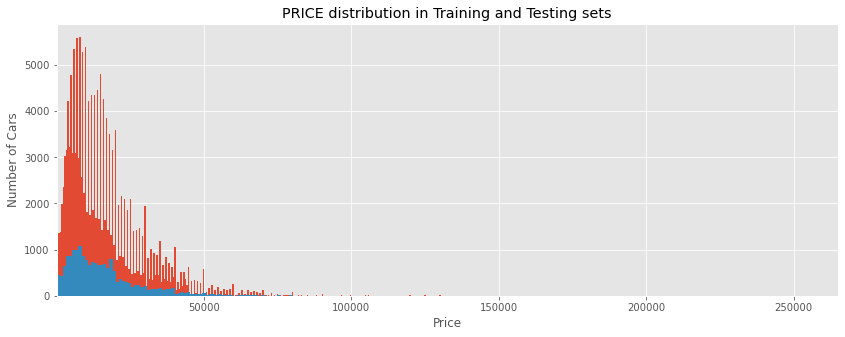

In [175]:
# Check if training and testing sets have similar distributions 
plot_target_distribution(used_cars_price_tr, used_cars_price_test, "PRICE distribution in Training and Testing sets")

Both distributions look fine. Now, the same steps are performed for splitting train data into train and validations sets. It is better to have the same number of entries in the validation set, too. Since 10% test (validation) size will not produce the same number as above, it is calculated in advance.

In [176]:
print(f"Share of entries in validation set: {18893 / len(used_cars_tr)}")

Share of entries in validation set: 0.11111633897746855


In [177]:
used_cars_train, used_cars_val, used_cars_price_train, used_cars_price_val = train_test_split(
    used_cars_tr, used_cars_price_tr, test_size = 0.11111633897746855, random_state = 35)

In [178]:
print(f"Shape of used_cars attributes for training: {used_cars_train.shape}")
print(f"Shape of used_cars target for training: {used_cars_price_train.shape}")
print(f"Shape of used_cars attributes for validation: {used_cars_val.shape}")
print(f"Shape of used_cars target for validation: {used_cars_price_val.shape}")

Shape of used_cars attributes for training: (151136, 132)
Shape of used_cars target for training: (151136,)
Shape of used_cars attributes for validation: (18893, 132)
Shape of used_cars target for validation: (18893,)


There are 151 136 entries for training, 18893 for validation, and 18893 for testing. Price distribution of training and validation sets is displayed below.

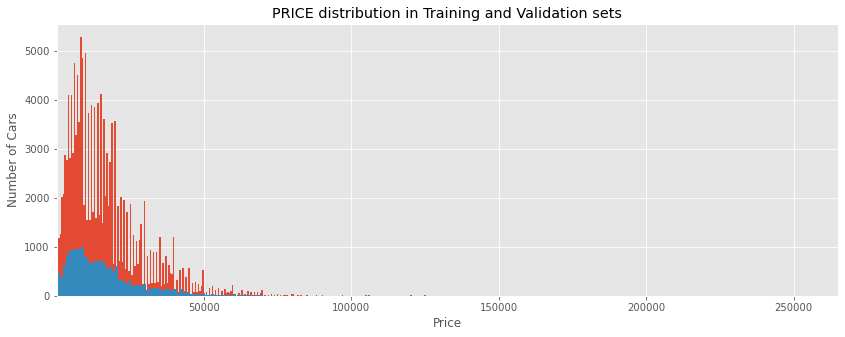

In [179]:
# Check if training and validation sets have similar distributions 
plot_target_distribution(used_cars_price_train, used_cars_price_val, "PRICE distribution in Training and Validation sets")

Splitting was successful. There are sufficient entries in all sets, thus the Law of Large Numbers will take effect.

#### Search for the best model
**A. `Linear Regression` without adjustment**

Initialization of Linear Regression is the first step of modelling. Linear Regression does not have adjustable *hyperparametes* except "intercept" - the independent term $b$ of the equation $y = ax + b$. "Fit_intercept" is set to "True" by default. *Parameters* are the elements that are used for training (e.g. $x$ in the above equation), i.e. those that are altered by *gradient descent*. On the other hand, hyperparameters are fixed before running the algorithm.

In [180]:
lg = LinearRegression()

In [181]:
# Fit training sets - both attributes and target - to the model
lg.fit(used_cars_train, used_cars_price_train)

LinearRegression()

Attributes' coefficients are comparable since all values range between 0 and 1. In general, model's coefficients show how important each attribute is for the final result (i.e. for the target).

In [182]:
lg.coef_

array([ 5.71776617e+04, -2.51225776e+05,  2.99322110e+03, -2.14194943e+03,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  4.52311908e+15,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  3.12722634e+14,
        3.12722634e+14,  3.12722634e+14,  3.12722634e+14,  7.43662554e+15,
        7.43662554e+15,  7.43662554e+15,  7.43662554e+15,  7.43662554e+15,
        7.43662554e+15,  

Many columns have one and the same weight. It could be concluded that the first column, and those with scientific notation of e+03 and e+05 are of greater importance than the others. Now, it is time to calculate predicted values and to evaluate the model.

In [183]:
prediction_lr = lg.predict(used_cars_train)

In [184]:
mean_squared_error(used_cars_price_train, prediction_lr)

89556315.38466017

In [185]:
np.sqrt(mean_squared_error(used_cars_price_train, prediction_lr))

9463.419856725166

RMSE is relatively high (9463.42 USD). This might suggest either underfitting, or a great difference between target's minimum and maximum values. 

If underfits, the model might be too weak for the training data, most likely due to high bias (wrong assumptions). In other words, training data are not described well; the model could not draw a straight line through the dots (prices). Also, this model might have high variance but this could not be confirmed with sufficient degree of certainty. High variance could not be controlled without hyperparameters. 

It would be interesting to see model's performance on validation set. The code lines below quicky compute these operations.

In [186]:
lg.fit(used_cars_val, used_cars_price_val)

lg.coef_

array([ 5.98691931e+04, -2.64694193e+05,  7.49282021e+03, -4.03220454e+02,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15,  4.60237952e+15,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15,  4.60237952e+15,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15,  4.60237952e+15,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15,  4.60237952e+15,
        2.92624236e+15,  4.60237952e+15,  4.60237952e+15,  4.60237952e+15,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15, -8.08706453e+14,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15,  4.60237952e+15,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15,  4.60237952e+15,
        4.60237952e+15,  4.60237952e+15,  1.87669397e+15,  4.60237952e+15,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15,  4.60237952e+15,
        4.60237952e+15,  4.60237952e+15,  4.60237952e+15, -1.54418795e+16,
       -1.54418795e+16, -1.54418795e+16, -1.54418795e+16, -1.54418795e+16,
       -1.54418795e+16, -

In [187]:
prediction_lrv = lg.predict(used_cars_val)

In [188]:
# Check shape of validation set and of predicted values
used_cars_price_val.shape, prediction_lrv.shape

((18893,), (18893,))

In [189]:
mean_squared_error(used_cars_price_val, prediction_lrv)

85001492.98877892

In [190]:
np.sqrt(mean_squared_error(used_cars_price_val, prediction_lrv))

9219.625425622178

Both metrics slightly decrease. It is interesting to see what $R^2$ of both sets is. 

#### Measuring $R^2$

In [191]:
print(f"R-squared of training set: {r2_score(used_cars_price_train, prediction_lr)}")
print(f"R-squared of validation set: {r2_score(used_cars_price_val, prediction_lrv)}")

R-squared of training set: 0.4716580544045983
R-squared of validation set: 0.4843167416693863


$R^2$ on validation set is somewhat higher, most likely due to chance. Nonetheless, both figures are far below the acceptable threshold of 70%.

#### Displaying Learning Curve

Another metric showing how Linear Regression deals with used cars data is the Leaning Curve. As is explained [here](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html), it "shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples". Visualization is used to show: (1) How much the estimator benefits from more data; and (2) If the estimator is more sensitive to error due to variance vs. error due to bias.

`Learning_curve()` function needs at least an estimator (in this case - Linear Regression), attributes, and a target. In addition, the number of folds for cross validatoon could be defined in advance. If not, default settings apply (i.e. "None"). Specifying "scoring" is another important element. Otherwise, it will use the estimator's default metric. Negative MSE is used below as the closest one to those used so far. "Njobs = -1" tells the computer to use all CPUs for these calculations. `Learning_curve()` comptes train sizes, and scores on the training and the testing set. It does not take into account prior splitting, fitting, predictions and scorings.

In [192]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), 
                                                        used_cars_attributes_scaled, 
                                                        used_cars_price, 
                                                        cv = 5, 
                                                        scoring = "neg_mean_squared_error", 
                                                        n_jobs = -1, 
                                                        random_state = 35)
#* This code and those that follow are taken from "Plot The Learning Curve", 
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/

Thereafter, mean and standard deviation values are caluclated both for the training and the testing set scores.

In [193]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

In [194]:
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

Means and standard deviations help for plotting the learning curve. The figure below shows that 50 000 entries in a set are sufficient for flattening the curve. 

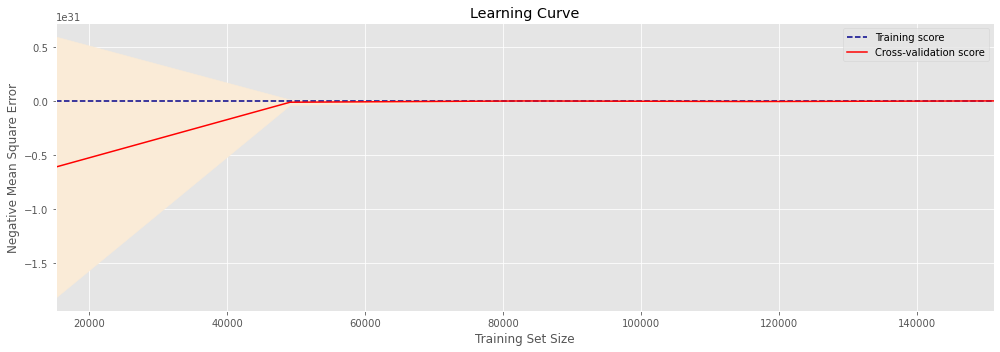

In [195]:
plt.style.use("ggplot")
plt.figure(figsize = (14, 5))
# Draw lines
plt.plot(train_sizes, train_mean, '--', color = "darkblue",  label = "Training score")
plt.plot(train_sizes, test_mean, color = "red", label = "Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "antiquewhite")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Square Error")
plt.margins(x = 0)
plt.legend(loc = "best")
plt.tight_layout()

plt.show()

A non-Linear Regression (a polynomial function) might perform better. To that end used cars data are subject to additional transformations before being regressed again.

**B. `Linear Regression` with `Polynomial Features`**

According to [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_regression) "polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in $x$. Polynomial regression fits a nonlinear relationship between the value of $x$ and the corresponding conditional mean of $y$, denoted $E(y |x)$. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function $E(y | x)$ is linear in the unknown parameters that are estimated from the data."

Scikit-learn has a [function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) `PolynomialFeatures()` for generating a new matrix consisting of all polynomial combinations of features with degree less than or equal to the specified degree.

`Polynomial Features()` is applied to the original data before splitting, save to target column. Thus, all attributes are transformed and then split again. The latter reduces the risk of making imbalanced training, validation and training sets. However, since used_cars dataset is **too large and needs a lot of RAM, polynomial transformation is performed only to half of it**. The work begins with recalling the shape of attributes and target.

In [196]:
print(f"Attributes shape: {used_cars_attributes_scaled.shape}"), 
print(f"Target shape: {used_cars_price.shape}")

Attributes shape: (188922, 132)
Target shape: (188922,)


Used_cars datasets look fine. The next step is to separate both sets randomly and evenly, and to the store selected entries in other variables. This is done by Python's `sample()` function which accepts either number of rows or share of the dataset to be set aside.

In [197]:
half_att = pd.DataFrame(used_cars_attributes_scaled).sample(frac = 0.50, random_state = 35)

In [198]:
# Check the new dataset's shape
half_att.shape

(94461, 132)

In [199]:
half_price = pd.DataFrame(used_cars_price).sample(frac = 0.50, random_state = 35)

In [200]:
# Check the new column shape
half_price.shape

(94461, 1)

Separation seems successful except the target variable, which is stored as a DataFrame - a type inconvenient for modelling. Forthcoming transformations and computations require Pandas Series so the target column is converted into Series.

In [201]:
half_price = half_price.squeeze(axis = 1)

In [202]:
half_price.shape

(94461,)

#### Polynomial Transformation

`PolynomialFeatures()` transformation is possible now. It is initialized and stored in a variable. The function has several hyperparameters: "degree" - the polynomial degree, by default is equal to 2; "interaction_only" - by default is "False", if "True", only interaction features are produced; "include_bias" by default is set to "True" - in this case a bias column is included, i.e. the feature in which all polynomial powers are zero (a column of ones acts as an intercept term in a linear model); and "order" - by default "C", could accept "F" - faster to compute but slows down the estimator. Polynomial transformation below is without any fine-tuning, i.e. with default hyperparameters.

In [203]:
poly_1 = PolynomialFeatures()

In [204]:
# Fit and transform data into polynomial
used_cars_attributes_scaled_poly = poly_1.fit_transform(half_att)

In [205]:
# Check polynomial attributes' shape
used_cars_attributes_scaled_poly.shape

(94461, 8911)

Polynomial features transforms data by multiplying each column with the others, and compute each column's second degree (e.g. if features are $a$ and $b$, degree-2 polynomial features are $1, a, b, a^2, ab, b^2$. Thus, the matrix expanded from 132 features to 8911. However, any algorithm will work too slow with such a huge number of features. For this reason, their number is reduced by selecting the most important ones. The latter is performed by `Principal Component Analysis`.

#### Principal Component Analysis

Principal Component Analysis, or PCA, is performed by initializing PCA function. It is stored in a variable. In order to avoid time consuming computations, "n_components", i.e. the number of features whose importance is being estimated, is set to 200. It might be less, but there is a risk of losing information. Thereafter, the attributes are fed to Regression again.

In [206]:
pca_lr = PCA(n_components = 200)

In [207]:
principle_components_01 = pca_lr.fit(used_cars_attributes_scaled_poly)

"Explained_variance_ratio_" shows each column's percentage in the total variance. The latter is similar to "feature importances" (see below). The first feature bears 7.23% of data variance; the second - 6.01%. Thus, when plotted (see below), the diminishing loss in variance is displayed. This is useful for choosing features that will both maximise information, and will reduce their overall number.

In [208]:
principle_components_01.explained_variance_ratio_

array([0.07236492, 0.0600911 , 0.0561971 , 0.04512052, 0.03287708,
       0.02773828, 0.0239303 , 0.02234889, 0.02127943, 0.01848996,
       0.01727421, 0.01573752, 0.01446951, 0.01407996, 0.01334807,
       0.01145856, 0.01085288, 0.01005729, 0.00984951, 0.00963241,
       0.00938638, 0.00909904, 0.00904345, 0.00892902, 0.00875191,
       0.00845207, 0.00816196, 0.00808817, 0.0077513 , 0.00758145,
       0.00743547, 0.00722267, 0.00697622, 0.00676165, 0.00655904,
       0.00638173, 0.00630885, 0.00614194, 0.00592438, 0.00590316,
       0.00576628, 0.005436  , 0.00523425, 0.00521314, 0.00510029,
       0.00507413, 0.0049417 , 0.00482289, 0.00467935, 0.00446773,
       0.00423339, 0.00392589, 0.00389509, 0.00380152, 0.00359074,
       0.00346663, 0.00340202, 0.00337069, 0.00330212, 0.00325865,
       0.00316699, 0.00309093, 0.00305642, 0.00303503, 0.00294825,
       0.00292448, 0.00282573, 0.00280103, 0.00272328, 0.00265233,
       0.0026024 , 0.00248815, 0.00237094, 0.00231529, 0.00224

In [209]:
def plot_variance_ratio(principal_components):
    plt.figure(figsize = (10, 5))
    plt.plot(principal_components.explained_variance_ratio_, c = "darkblue")

    plt.title("Explained variance ratio line")
    plt.xlabel("Principal Components")
    plt.ylabel("Components' Importance")

    plt.show()

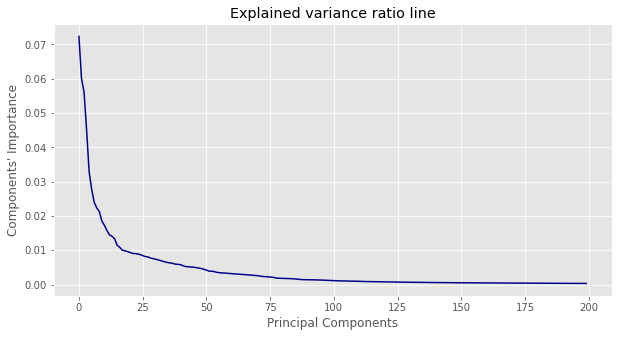

In [210]:
plot_variance_ratio(principle_components_01)

Information loss disappears (is almost equal to 0.01%) aroung the $100^{th}$ column. Thus, instead to place 8911 features into the Linear Regression, it will get only 100, and will learn the data as good as if it got all attributes. The code lines below take the first 100 columns and check if this operation was successful.

In [211]:
used_cars_attributes_scaled_poly_pc = used_cars_attributes_scaled_poly[:,:100]

In [212]:
used_cars_attributes_scaled_poly_pc.shape

(94461, 100)

Attributes and target are split again. Linear Regression is applied thereafter, and is followed by checking MSE/RMSE and $R^2$.

In [213]:
half_att_poly_tr, half_att_poly_test, half_price_poly_tr, half_price_poly_test = train_test_split(
    used_cars_attributes_scaled_poly_pc, half_price, test_size = 0.1, random_state = 35)

In [214]:
print(f"Shape of used_cars attributes for training: {half_att_poly_tr.shape}")
print(f"Shape of used_cars target for training: {half_price_poly_tr.shape}")
print(f"Shape of used_cars attributes for testing: {half_att_poly_test.shape}")
print(f"Shape of used_cars target for testing: {half_price_poly_test.shape}")

Shape of used_cars attributes for training: (85014, 100)
Shape of used_cars target for training: (85014,)
Shape of used_cars attributes for testing: (9447, 100)
Shape of used_cars target for testing: (9447,)


Splitting was successful. A quick check if distribution is balanced follows below.

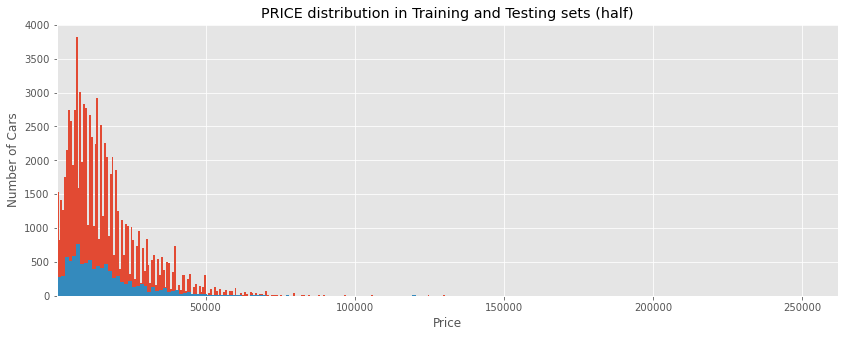

In [215]:
plot_target_distribution(half_price_poly_tr, half_price_poly_test, "PRICE distribution in Training and Testing sets (half)")

Distribution looks good. The next step is to calculate the share of testing against the training set. The figure below shows it is the same. Hence, the work proceeds with splitting the training into new training and validation sets.

In [216]:
print(f"Share of entries in the validation set: {9447 / len(half_att_poly_tr)}")

Share of entries in the validation set: 0.1111228738795963


In [217]:
half_att_poly_train, half_att_poly_val, half_price_poly_train, half_price_poly_val = train_test_split(
    half_att_poly_tr, half_price_poly_tr, test_size = 0.1111228738795963, random_state = 35)

In [218]:
print(f"Shape of used_cars attributes for training: {half_att_poly_train.shape}")
print(f"Shape of used_cars target for training: {half_price_poly_train.shape}")
print(f"Shape of used_cars attributes for validation: {half_att_poly_val.shape}")
print(f"Shape of used_cars target for validation: {half_price_poly_val.shape}")

Shape of used_cars attributes for training: (75567, 100)
Shape of used_cars target for training: (75567,)
Shape of used_cars attributes for validation: (9447, 100)
Shape of used_cars target for validation: (9447,)


All three sets were split properly. A check for price distribution in training and validations sets follows below.

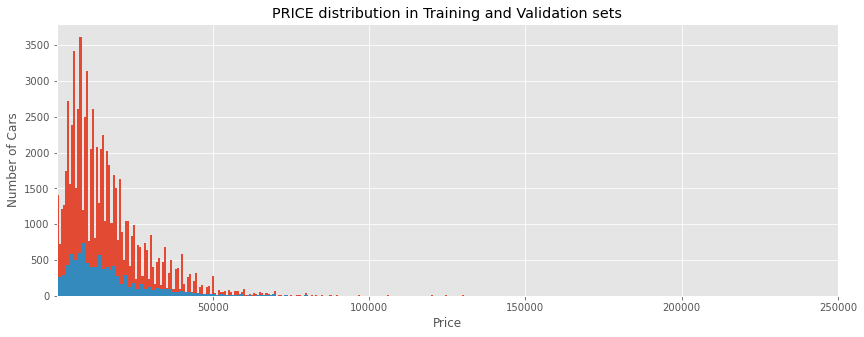

In [219]:
plot_target_distribution(half_price_poly_train, half_price_poly_val, "PRICE distribution in Training and Validation sets")

Splitting looks correct. Regression with (half) polynomial matrix is performed below.

In [220]:
lg.fit(half_att_poly_train, half_price_poly_train)

LinearRegression()

Model coefficients are not checked since it is impracticable to display 100 weights. The next steps predict prices and evaluate the model.

In [221]:
prediction_half_poly = lg.predict(half_att_poly_train)

In [222]:
half_att_poly_train.shape, prediction_half_poly.shape

((75567, 100), (75567,))

In [223]:
mean_squared_error(half_price_poly_train, prediction_half_poly)

89726855.97832388

In [224]:
np.sqrt(mean_squared_error(half_price_poly_train, prediction_half_poly))

9472.426087245225

RMSE is slightly higher than the one calculated without polynomial transformation. Nonetheless, the model is scored on validation data, too. To that end Regression is initialized again.

In [225]:
lg.fit(half_att_poly_val, half_price_poly_val)

LinearRegression()

In [226]:
prediction_half_poly_val = lg.predict(half_att_poly_val)

In [227]:
half_price_poly_val.shape, prediction_half_poly_val.shape

((9447,), (9447,))

In [228]:
mean_squared_error(half_price_poly_val, prediction_half_poly_val)

86283740.0114322

In [229]:
np.sqrt(mean_squared_error(half_price_poly_val, prediction_half_poly_val))

9288.90413404252

RMSE obtained on validation set is higher than the one on the model without polynomial transformation. Although not so usefull as MSE, it is worth measuring $R^2$ scores again.

##### Measuring $R^2$

In [230]:
print(f"R-squared of training set, polynomial: {r2_score(half_price_poly_train, prediction_half_poly)}")
print(f"R-squared of validation set, polynomial: {r2_score(half_price_poly_val, prediction_half_poly_val)}")

R-squared of training set, polynomial: 0.4715757216522313
R-squared of validation set, polynomial: 0.45815362682523164


Both $R^2$ scores are well below the acceptable threshold of 70%.

#### 4.1.4. Summary of Linear Regression

Many computations were made so far and one could get confused which model performed better. For this resoan all calculations and scorings are summarised below.

**Linear Regression without transformations. MSE/RMSE and $R^2$**
##### Training and Validation sets

The Linear Model obtained better scores on validation set than on the training one. If used in practice, custumers will get a price which is 9219 USD away from the mean. Alternatively, if they rely on the scores received on the training set, mean price might be up or down 9463 USD. Comparable outcomes produced $R^2$ metrics. Training set received 47%, whereas validation got 48.4%.

In [231]:
print(f"MSE, training set: {mean_squared_error(used_cars_price_train, prediction_lr)}")
print(f"RMSE, training set: {np.sqrt(mean_squared_error(used_cars_price_train, prediction_lr))}")
print("===================================")

print(f"MSE, validation set: {mean_squared_error(used_cars_price_val, prediction_lrv)}")
print(f"RMSE, validation set: {np.sqrt(mean_squared_error(used_cars_price_val, prediction_lrv))}")
print("===================================")

print(f"R-squared on training set: {r2_score(used_cars_price_train, prediction_lr)}")
print(f"R-squared on validation set: {r2_score(used_cars_price_val, prediction_lrv)}")

MSE, training set: 89556315.38466017
RMSE, training set: 9463.419856725166
MSE, validation set: 85001492.98877892
RMSE, validation set: 9219.625425622178
R-squared on training set: 0.4716580544045983
R-squared on validation set: 0.4843167416693863


**Linear Regression with Polynomial Features. MSE/RMSE and $R^2$**
##### Training and Validation sets

Polynomial transformation led to insignificant improvement. RMSE on the training data goes up to 9472 USD; it is slightly higher on validation set, too. Model's performance is confirmed by R-squared, where the training set approximates the real data 47%, and the validation set - 45.8%.

In [232]:
print(f"MSE, training set, polynomial: {mean_squared_error(half_price_poly_train, prediction_half_poly)}")
print(f"RMSE, training set, polynomial: {np.sqrt(mean_squared_error(half_price_poly_train, prediction_half_poly))}")
print("===================================")

print(f"MSE, validation set, polynomial: {mean_squared_error(half_price_poly_val, prediction_half_poly_val)}")
print(f"RMSE, validation set, polynomial: {np.sqrt(mean_squared_error(half_price_poly_val, prediction_half_poly_val))}")
print("===================================")

print(f"R-squared on training set, polynomial: {r2_score(half_price_poly_train, prediction_half_poly)}")
print(f"R-squared on validation set, polynomial: {r2_score(half_price_poly_val, prediction_half_poly_val)}")

MSE, training set, polynomial: 89726855.97832388
RMSE, training set, polynomial: 9472.426087245225
MSE, validation set, polynomial: 86283740.0114322
RMSE, validation set, polynomial: 9288.90413404252
R-squared on training set, polynomial: 0.4715757216522313
R-squared on validation set, polynomial: 0.45815362682523164


In sum, Linear Regression with polynomial transformation does not approximate real data better than the model without any additional adjustments.

**Note**: Linear Regression with Polinomial transformation without PCA (i.e. with all 8911 columns) **retunrs $R^2$ above 70%** and **RMSE of around 5000 - 6000 USD**.

#### 4.1.5. Select model

Linear Regression without Polynomial transformation performs better, i.e. it learns data better than the model with 100 columns. Both models receive similar scores on training and validation sets (measured both by RMSE and $R^2$). However, it is more efficient to train a simpler model, i.e. one without additional transformations. For this reason, doing Linear Regression without any adjustments seems more acceptable solution. 

Therefore, the testing set is passed to the simple Linear Regression. Its performance and evaluation follow below.

In [233]:
# Check testing data shape
used_cars_test.shape, used_cars_price_test.shape

((18893, 132), (18893,))

In [234]:
lg.fit(used_cars_test, used_cars_price_test)

LinearRegression()

In [235]:
prediction_testing = lg.predict(used_cars_test)

In [236]:
used_cars_price_test.shape, prediction_testing.shape

((18893,), (18893,))

In [237]:
print(f"MSE, testing set, polynomial: {mean_squared_error(used_cars_price_test, prediction_testing)}")
print(f"RMSE, testing set, polynomial: {np.sqrt(mean_squared_error(used_cars_price_test, prediction_testing))}")
print("=======================")

print(f"R-squared on testing set, polynomial: {r2_score(used_cars_price_test, prediction_testing)}")

MSE, testing set, polynomial: 81147621.47303234
RMSE, testing set, polynomial: 9008.197459704817
R-squared on testing set, polynomial: 0.5069085530320637


RMSE decreased on the testing set (9008.20 USD). Although relatively high, it should be reminded here that cars' prices varied between 101 USD and 600 000 USD - a too broad range. Thus, it is quite possible a predictor to mistake the price with plus or minus 9 000 dollars.

In conclusion it could be said that **car's features could predict its price only to a certain extent**. The testing excercise showed that this extent could reach 50% (with  available attributes and observations).

#### 4.1.6. Present a complete regression solution

This last part presents a concise and complete solution for testing Hypothesis No. 1. All exploratory steps and considerations above are deliberately omitted. Only the main operations such as removing features and NaNs are performed below. Sklearn's `Pipeline()` function is used for simultaneous data scaling and modelling. The dataset is split only into training and testing sets with a ratio of 80:20. Both sets are scored with MSE and $R^2$. As expected, Linear Regression (without any transformations such as polynomial features and dimensionality reduction) returns similar results.

The original dataset is called again and saved into `used_cars_p`. Thereafter all **unnecessary columns are removed**.

In [238]:
used_cars_p = pd.read_csv(USED_CARS)

In [239]:
used_cars_p = used_cars_p.drop(["url", "region", "region_url", "model", "cylinders", "vin", "drive", "size", 
                                "paint_color","image_url", "description", "county"], axis = 1)

Next, **"id" column is assigned as index one**. All NaN values in "condition" column are replaced with **"unknown"** category. These operations are followed by **removal of all NaNs from the dataset**.

In [240]:
used_cars_p = used_cars_p.set_index("id")

In [241]:
used_cars_p["condition"] = used_cars_p["condition"].replace(np.nan, "unknown")

In [242]:
used_cars_p = used_cars_p.dropna()

Then, all cars **worth 400 000 USD or more and 100 USD or less are dropped off** from the matrix.

In [243]:
used_cars_p = used_cars_p.loc[used_cars_p["price"] <= 400000]

In [244]:
used_cars_p = used_cars_p[used_cars_p["price"] >= 100]

Before to proceed, it is important to check dataset's shape.

In [245]:
used_cars_p.shape

(188922, 12)

Preprocessing continues with **separation**: one variable holds the attributes and another - the target (cars' prices).

In [246]:
used_cars_p_att = used_cars_p.drop(["price"], axis = 1)

In [247]:
used_cars_p_price = used_cars_p["price"]

All category featues are converted into **dummies**. Thereafter, attributes and target are **split into training and testing sets**.

In [248]:
used_cars_p_att = pd.get_dummies(used_cars_p_att)

In [249]:
attr_tr, attr_test, price_tr, price_test = train_test_split(used_cars_p_att,
                                                           used_cars_p_price,
                                                           test_size = 0.2,
                                                           random_state = 35)

It is very important to keep track on datasets' shape. If splitting was not correct, model fitting, predicting and scoring might either fail or return wrong numbers.

In [250]:
attr_tr.shape,  price_tr.shape, attr_test.shape, price_test.shape

((151137, 132), (151137,), (37785, 132), (37785,))

`Pipeline()` simplifies computing by simultaneous scaling and modelling. The latter are stored in `pipe` variable.

In [251]:
pipe = Pipeline([("scaler", MinMaxScaler()),
                 ("linear_regression", LinearRegression())])

Finally, `pipe` **receives the training data**. Thereafter, model's performance (with training data) is **evaluated**. 

In [252]:
pipe.fit(attr_tr, price_tr)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('linear_regression', LinearRegression())])

In [253]:
print(f"Train set, R-squared: {pipe.score(attr_tr, price_tr)}")

Train set, R-squared: 0.4770595306207962


In [254]:
pred_train = pipe.predict(attr_tr)

In [255]:
print(f"Train set, RMSE: {np.sqrt(mean_squared_error(price_tr, pred_train))}")

Train set, RMSE: 9401.723617796917


Both RMSE and $R^2$ return **comparable scores** on the training set. Those on the testing set should be similar. 

In [256]:
pipe.fit(attr_test, price_test)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('linear_regression', LinearRegression())])

In [257]:
print(f"Test set, R-squared: {pipe.score(attr_test, price_test)}")

Test set, R-squared: 0.4704849322038315


In [258]:
pred_test = pipe.predict(attr_test)

In [259]:
print(f"Test set, RMSE: {np.sqrt(mean_squared_error(price_test, pred_test))}")

Test set, RMSE: 9392.519280323879


The model, as expected, performs slightly better on the testing set. It could be assumed that modelling would have been more successful if there were not so many NaNs in the dataset and category values were less diverse.

---------------------------------------------------------------------------------------------------------------------

### 4.2. Testing hypothesis No. 2 with Classification.
### Do car's value and its features predict its technical condition?

A modern and a good looking car could be in a poor condition. And vice versa: a not so attractive one could be in perfect state. It is assumed, however, that car's characteristics, e.g. year of manufacturing, travelled distance, price, etc., could serve as a hint about its condition. 

**Hypothesis No. 2** is tested with **Classification algorithms** (supervised learning, too) such as SGDClassifier, Random Forest, and Adaptive Boosting. The best model finds the smallest difference between predicted and real data. Classification algorithms also draw lines between points in space. Unlike Regression, however, Classificators divide points into groups, each holding similar points. This exercise will try to find the lines that best divide cars' condition. 

Hypothesis is proved if "f1_score" (average of precision and recall) reaches 70% or higher. Other metrics (e.g. accuracy, confusion matrix) are used where appropriate. Their meaning is explained below.

Doing Classification requires completing several preliminary steps. The first one is to separate dataset into “attributes” and “label” (condition) variables. Thereafter, all columns are converted into numerical. This is performed by pandas `get_dummies()` function to all non-numerical (categorical) variables. `LabelEncoder()` is used for converting label categories. All these and other preprocessing steps are preceded by recalling the dataset and its shape.

In [260]:
used_cars_clean.head()

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state,lat,long
id,,,,,,,,,,,,
7184712241,16995.0,2007.0,gmc,good,diesel,254217.0,clean,automatic,truck,mn,45.6836,-92.9648
7184711787,13995.0,2012.0,ford,good,gas,188406.0,clean,automatic,truck,mn,45.6836,-92.9648
7184710887,7995.0,2010.0,chevrolet,good,gas,108124.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184710023,8995.0,2011.0,chevrolet,good,gas,178054.0,clean,automatic,SUV,mn,45.6836,-92.9648
7184709156,10995.0,2014.0,ford,good,gas,170259.0,clean,automatic,SUV,mn,45.6836,-92.9648


In [261]:
used_cars_clean.shape

(188922, 12)

The dataset has 188 922 entries and 12 features. Classification will be peformed with half of the dataset for avoiding RAM complications. Hence, a new variable `ch_clean` ("ch" - abbreviation of "classification, half") is created to store 50% of all entries. Thereafter, the new dataset is separated into attributes and label.

In [262]:
ch_clean = used_cars_clean.sample(frac = 0.50, random_state = 35)

In [263]:
ch_clean.shape

(94461, 12)

#### 4.2.1 Separate attributes and label

In [264]:
# Store attributes in a new variable
ch_attr = ch_clean.drop(["condition"], axis = 1)

In [265]:
# Store label in a new variable
ch_label = ch_clean["condition"]

In [266]:
# Check shape of attributes and label
ch_attr.shape, ch_label.shape

((94461, 11), (94461,))

Separation was successful. Before to proceed, labels are checked and displayed below.

In [267]:
print(ch_label.unique())
len(ch_label.unique())

['fair' 'good' 'unknown' 'excellent' 'like new' 'salvage' 'new']


7

#### 4.2.2 Preprocessing for Classification

Data preprocessing encompasses four steps: (1) convert all category features into numerical ones (Machine Learning algorithms do not work with non-numerical values), (2) scale attributes (for avoiding errors) and encode labels (for easier interpretation), (3) PCA, and (4) split data into training, validation, and testing sets.

##### Convert categories into numeric variables

In [268]:
ch_attributes = pd.get_dummies(ch_attr, columns = ["manufacturer", "fuel", "title_status", "transmission", "type", "state"])

In [269]:
# Check attributes' shape
ch_attributes.shape

(94461, 124)

##### Scale attributes and encode labels

Attributes are scaled by `MinMaxScaled()`, where values range between 0 and 1. Labels are encoded by `LabelEncoder()`.

In [270]:
scaler_classification = MinMaxScaler()

In [271]:
ch_attributes_scaled = scaler_classification.fit_transform(ch_attributes)

In [272]:
print(f"Minumum values of all columns: {ch_attributes_scaled.min(axis = 0)}")

print(f"Maximum values of all columns: {ch_attributes_scaled.max(axis = 0)}")

Minumum values of all columns: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Maximum values of all columns: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


All attributes were successfuly scaled. The code lines below convert labels into digits.

In [273]:
encoder = LabelEncoder()

In [274]:
ch_labels_encoded = encoder.fit_transform(ch_label)

In [275]:
ch_labels_encoded

array([1, 2, 6, ..., 0, 6, 3])

Both scaling and encoding were successful. Classification tasks usually do not require scaling of labels since their values are restricted within a given range (in this case between 0 and 6). 

##### Principle Component Analysis

It is assumed that polynomial transformation is not needed, and classification algorithms (one or more) will learn data sufficiently well. This assumption spares time and memory. Instead, a PCA is performed to check if there  more important features than others. To that end PCA is initialized again, data are passed to it and analysed. Its "components" are not restricted this time.

In [276]:
pca_cl = PCA()

In [277]:
principle_components_class = pca_cl.fit(ch_attributes_scaled)

In [278]:
principle_components_class.explained_variance_ratio_

array([8.66380357e-02, 7.14785521e-02, 4.95777380e-02, 4.67399986e-02,
       3.74527053e-02, 3.34719668e-02, 3.21931337e-02, 2.74653517e-02,
       2.54046961e-02, 2.21639990e-02, 2.13222410e-02, 1.92575280e-02,
       1.77162105e-02, 1.66287186e-02, 1.52671032e-02, 1.50740698e-02,
       1.45656045e-02, 1.43613943e-02, 1.36999755e-02, 1.32453392e-02,
       1.31254086e-02, 1.27315077e-02, 1.26178654e-02, 1.21585144e-02,
       1.15348735e-02, 1.13167529e-02, 1.08634691e-02, 1.07216997e-02,
       1.05700557e-02, 1.02170376e-02, 9.83014618e-03, 9.53815548e-03,
       9.19253797e-03, 9.03577298e-03, 9.00140959e-03, 8.61296027e-03,
       8.45778990e-03, 8.32253605e-03, 7.79444222e-03, 7.45982835e-03,
       7.45289666e-03, 7.36957414e-03, 7.10939699e-03, 6.86588185e-03,
       6.57966968e-03, 6.44952662e-03, 6.12994251e-03, 5.73509694e-03,
       5.54375979e-03, 5.32655231e-03, 5.15875350e-03, 4.96392155e-03,
       4.82747393e-03, 4.75690369e-03, 4.69575349e-03, 4.63123570e-03,
      

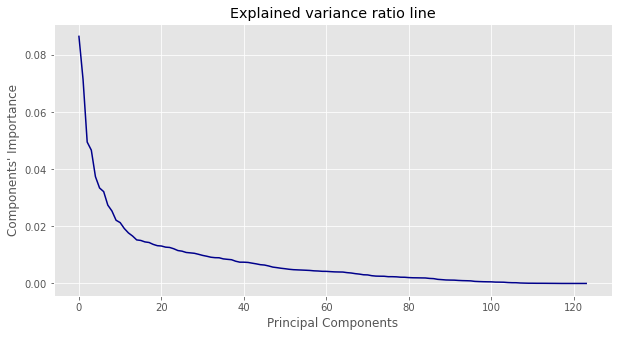

In [279]:
plot_variance_ratio(principle_components_class)

Feature importances diminish and reach 0 around the 110th component. Hence, it is meaningless to remove 14 columns, which could hardly speed up training and testing. Therefore, the work continues without dimensionality reduction.

##### Split data into training, validation, and testing sets

First thing first is to check datasets' shape (see below). It is better to keep 10% of data for testing, the same number of entries for validation, and the remaining rows - for training. As above, it is a two stage proces.

In [280]:
ch_attributes_scaled.shape, ch_labels_encoded.shape

((94461, 124), (94461,))

Initial splitting resulted in having training and testing sets; the latter being stratified by labels. 

In [281]:
ch_attributes_scaled_tr, ch_attributes_scaled_test, ch_labels_encoded_tr, ch_labels_encoded_test = train_test_split(
        ch_attributes_scaled,
        ch_labels_encoded, 
        test_size = 0.1,
        stratify = ch_labels_encoded,
        random_state = 35)

Split is followed by a brief check as to if all sets are in proper shape.

In [282]:
print(f"Shape of attributes for training: {ch_attributes_scaled_tr.shape}")
print(f"Shape of labels for training: {ch_labels_encoded_tr.shape}")
print(f"Shape of attributes for testing: {ch_attributes_scaled_test.shape}")
print(f"Shape of labels for testing: {ch_labels_encoded_test.shape}")

Shape of attributes for training: (85014, 124)
Shape of labels for training: (85014,)
Shape of attributes for testing: (9447, 124)
Shape of labels for testing: (9447,)


Initial training attributes and labels are 85 014. Tests will be performed over 9447 rows. Splitting seems all right. Both distributions are displayed below.

In [283]:
# Define function to display distribution
def plot_label_distribution(labels, title = None):
    """
    Function: computes and displays labels distribution.
    
    Parameters: labels dataset.
    
    Returns: plot of labels distribution.
    """
    plt.style.use("ggplot")
    plt.figure(figsize = (6, 3))
    plt.hist(labels, bins = "fd", color = "darkblue")

    if title is not None:
        plt.title(title)
    plt.xlabel("Labels")
    plt.ylabel("Number of Cars")
    plt.margins(x = 0)
    plt.xticks(fontsize = 10)

    plt.show()

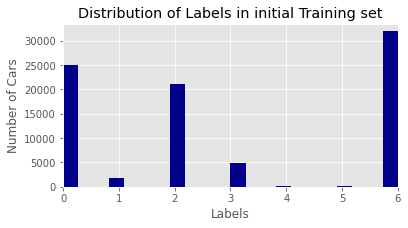

In [284]:
plot_label_distribution(ch_labels_encoded_tr, "Distribution of Labels in initial Training set")

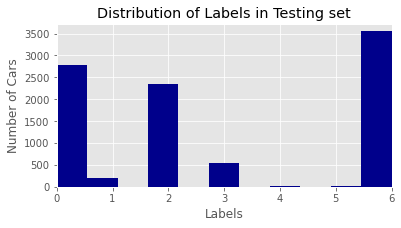

In [285]:
plot_label_distribution(ch_labels_encoded_test, "Distribution of Labels in Testing set")

Both labels sets have similar distribution: the highest number of cars are with "unknown" condition (No. 6), followed by vehicles in "excellent" (No. 0) and in "good" (No. 2) condition. Splitting is performed again for getting training and validation sets. The code line below calculates the share of entries in the whole set.

In [286]:
print(f"Share of entries in validation set: {9447 / len(ch_attributes_scaled_tr)}")

Share of entries in validation set: 0.1111228738795963


In [287]:
ch_attributes_scaled_train, ch_attributes_scaled_val, ch_labels_encoded_train, ch_labels_encoded_val = train_test_split(
        ch_attributes_scaled_tr,
        ch_labels_encoded_tr, 
        test_size = 0.1111228738795963,
        stratify = ch_labels_encoded_tr,
        random_state = 35)

Splitting is followed by a brief check as to if all sets are in proper shape.

In [288]:
print(f"Shape of attributes for training: {ch_attributes_scaled_train.shape}")
print(f"Shape of labels for training: {ch_labels_encoded_train.shape}")
print(f"Shape of attributes for validation: {ch_attributes_scaled_val.shape}")
print(f"Shape of labels for validation: {ch_labels_encoded_val.shape}")

Shape of attributes for training: (75567, 124)
Shape of labels for training: (75567,)
Shape of attributes for validation: (9447, 124)
Shape of labels for validation: (9447,)


Good. The training set holds 75 567 entries and the validation set - 9447 (as is the testing set). Splitting seems all right. Both distributions are displayed below.

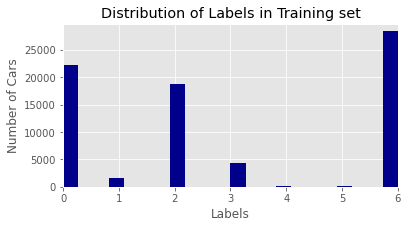

In [289]:
plot_label_distribution(ch_labels_encoded_train, "Distribution of Labels in Training set")

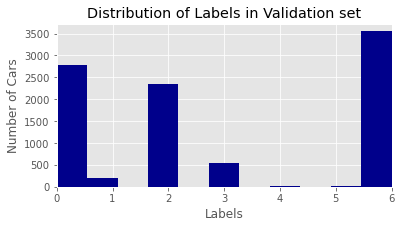

In [290]:
plot_label_distribution(ch_labels_encoded_val, "Distribution of Labels in Validation set")

Training and validation labels come from one and the same distribution. It seems the data are ready for trainig.

#### 4.2.3 Model Training and Improvement

Modelling objective is to identify an algorithm that best predicts a car's condition taking into account its characteristics. As seen earlier, the task here is to classify cars into 7 categories. The latter means that it wouldn't be a binary (distinguishing between two classes) but a **multiclass** (distinguishing between more than two classes) classification. In his book "Hands on Machine Learning [...]" Aurélien Géron[10] explains that "some algorithms (such as SGD classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively. Others (such as Logistic Regression or Support Vector Machine classifiers) are strictly binary classifiers". 
Scikit-Learn detects when a binary classification algorithm is used for a multiclass classification task, and it automatically runs [One-vs-Rest] or [One-vs-One], depending on the algorithm. 

Having this note in mind, **Hypothesis No.2** is tested with SGDClassifier and Random Forest, as well as with Adaptive Boosting.

Several metrics are used for measuring models' performance. The leading one is "f1_score", followed by "accuracy", "confusion matrix" and "classification report". Their meaning is explained below. The work begins with SGD classifier.

#### A. `SGDClassifier`

Scikit-Learn [documentation](https://scikit-learn.org/stable/modules/sgd.html) describes `SGDClassifier` as "a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression". It is also said that "SGD is merely an optimization technique and does not correspond to a specific family of machine learning models." Some tuning issues are explained too: "using SGDClassifier(loss='log') results in logistic regression, i.e. a model equivalent to LogisticRegression which is fitted via SGD instead of being fitted by one of the other solvers in LogisticRegression. Similarly, GDRegressor (loss='squared_loss', penalty='l2') and Ridge solve the same optimization problem, via different means."

The advantages of SGDClassifier are its efficiency and ease of implementation (lots of opportunities for code tuning). On the other hand, a requirement for number of hyperparameters such as the regularization parameter, for number of iterations, and its sensitivity to feature scaling are among its disadvantages.

Cars are categorised by SGDClassifier's default loss function: "hinge", which gives a linear Support Vector Machine. Many hyperparameters could be adjusted here, e.g. "penalty" (the type of regularization to be applied), "alpha" (a constant that multiplies the regularization term, the higher the value, the stronger the regularization), "fit_intercept" (whether the intercept should be estimated or not), "shuffle" (whether or not the training data should be shuffled after each epoch), "learning_rate" (the preferable learning rate schedule), etc. Only "penalty", "alpha", and "max_iter" hyperparameters are used for this exercise, the latter specifying the maximum number of passes over the training data (epochs). Higher number and range of hyperparameters means more time for searching and cross validation. 

Adjusting an algorithm requires finding the right hyperparameters that minimize the chosen cost function. `GridSearchCV()` is usually used for finding and selecting the best hyperparameters. It needs a dictionary with a range for each hyperparameter for preliminary training and scoring. This dictionary (`params_sgd`) is passed to `GridSearch()` along with an estimator (in this case "SGDClassifier"), with metrics that is going to evaluate the model ("f1_score"), and the number of folders the function is going to use for model training and validation.

`GridSearch()` is performed with "early_stoping" set to "True". This means that searching will terminate training if validation score is not improving. For this reason, "validation_fraction" receives value (e.g. 0.15) as a proportion of training data set aside. 

The first step is to prepare the scoring metric that should be placed in `GridSearch`, followed by the type and range of model's hyperparameters.

In [291]:
f1 = make_scorer(f1_score , average = "weighted")

**Note**: Calculating "f1_score" requires at the least real labels' values and predicted labels. Since cars' "condition" is classified in 7 categories, "f1_score" needs values in "average" parameter, which should be different from "binary". The chosen one is "weighted". According to the function's description, "it calculates metrics for each label, and finds their average weighted by support (the number of true instances for each label). This alters 'macro' to account for label imbalance; it can result in an F-score that is not between precision and recall". The assumption below is that "f1_score" is properly computed and is between precision and recall.

In [292]:
params_sgd = {
    "penalty": ["l2", "l1", "elasticnet"],
    "alpha": [0.00001, 0.0001, 0.001, 0.01]
}

In [293]:
grid_search_sgd = GridSearchCV(SGDClassifier(early_stopping = True, validation_fraction = 0.15, random_state = 35), 
                               param_grid = params_sgd, 
                               scoring = f1, 
                               cv = 4, 
                               n_jobs = -1)

Training attributes and labels are fed to the grid for searching and scoring.

In [294]:
grid_search_sgd.fit(ch_attributes_scaled_train, ch_labels_encoded_train)

GridSearchCV(cv=4,
             estimator=SGDClassifier(early_stopping=True, random_state=35,
                                     validation_fraction=0.15),
             n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring=make_scorer(f1_score, average=weighted))

It is intersting to see cross validation results when searching is complete.

In [295]:
grid_search_sgd.cv_results_

{'mean_fit_time': array([5.45399517, 7.54625785, 7.24592578, 5.43584287, 6.65939659,
        6.90475291, 5.45429468, 6.90004683, 6.68301803, 5.40621537,
        5.91928345, 5.58303857]),
 'std_fit_time': array([0.45159029, 0.79036574, 0.38898861, 0.36837185, 0.40079512,
        0.55509818, 0.2583523 , 0.56978505, 0.55141957, 0.22853299,
        0.28571327, 0.3543558 ]),
 'mean_score_time': array([0.0319376 , 0.02909255, 0.02950889, 0.03103435, 0.02775973,
        0.03205705, 0.03792751, 0.03231883, 0.03137195, 0.03283185,
        0.02482307, 0.01734859]),
 'std_score_time': array([0.00493336, 0.00231596, 0.00196368, 0.00547006, 0.00143742,
        0.00137561, 0.00879277, 0.00690147, 0.00637651, 0.00607115,
        0.00164752, 0.00298352]),
 'param_alpha': masked_array(data=[1e-05, 1e-05, 1e-05, 0.0001, 0.0001, 0.0001, 0.001,
                    0.001, 0.001, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, 

The summary above indicates that the best results are obtained with the fifth combination (rank_test_score): "alpha: 0.0001 and "penalty": "l1" ("accuracy" is 43.63% and "f1_score" is 41.61%). A brief look at test_scores for each combination shows that the fifth one really returns the highest figures. However, when tested in practice, it turns out that scores are higher when the function gets "l2" regularisation (see below).

In [296]:
sgd_clf = SGDClassifier(alpha = 0.0001, penalty = "l2", early_stopping = True, validation_fraction = 0.1, random_state = 35)

In order to avoid repeating one and the same computations several times, "fit", "predict", and "score" operations are placed in a function (see below). The latter is used for Classifiers used later.

In [297]:
def classification_task(estimator, attributes, labels):
    """
    Function: "fit", "predict" and "score" values of an estimator.
    
    Parameters: estimator, attributes (X) and labels (y).
    
    Returns: model's performance measured as accuracy and f1_score.
    """
    estimator.fit(attributes, labels)
    predictions = estimator.predict(attributes)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [298]:
# Compute and evaluate SGDClassifier with training attributes and labels
classification_task(sgd_clf, ch_attributes_scaled_train, ch_labels_encoded_train)

Accuracy: 0.46345627059430705
F1 score: 0.46794240896489886


It would be interesting to see how model performs with validation data.

In [299]:
# Compute and evaluate SGDClassifier with validation attributes and labels
classification_task(sgd_clf, ch_attributes_scaled_val, ch_labels_encoded_val)

Accuracy: 0.4690377897745316
F1 score: 0.46305846040902215


"F1_score" and "accuracy" have almost identical values both on the training and on validation sets. This could be interpreted as the model is neither overfitting nor underfitting. 

It should be explained here the meaning of "accuracy" and "f1_score". The former is the default estimators' metric. However, it is not the most appropriate one in certain cases. It is believed that "f1" returns more realistic picture and for this reason is the preferred one. 

"Accuracy" is defined as the number of guessed classes against all trials: $\frac{TP + TN} {TP + TN + FP + FN}$, where "T" stands for "True", "F" - for "False", "P" for "Positive", and "N" for "Negative". In general, a higher accuracy indicates for higher number of guessed labels.

$F1$ computes the average geometric of "precision" and "recall" - another classification metrics. The former looks into the ratio between true positives and all predicted positives ($\frac{TP} {TP + FP}$), and the latter - into the ratio between all positives and those that are really positive ($\frac{TP} {TP + FN}$). $F1$ is computed as doubling the number of true positives divided by the doubled true positives plus all false positives and all false negatives.

In sum, SGDClassifier's "f1" and "accuracy" are far below the threshold of 70%. It is assumed that Random Forest will classify labels better.

#### B. `Random Forest` Classifier

Random Forest is a Machine Learning algorithm (both for classification and regression tasks) with many trees trained simultaneously. Each tree gets a sample from data, which could be replaced (i.e. an entry used for training a tree could be taken again for training of another tree). Each tree gets random part and random featrues of the dataset. 

The most important hyperparameter is the number of trees for training. Law of Large Numbers is enforced here due to random combinations. Thus, it does not matter what each particular tree recieves and learns. The final score is computed after the so called "majority vote", i.e. the average score of all trees obtained on the data they got. 

If an algorithm is trained with more trees, their depth should be smaller. Many trees with greater depth lead to overfitting. Therefore, the rule of tumb is "more trees but shallower ones".

The work proceeds with tuning Random Forest's main hyperparameters - number of trees and maximum depth. `GridSearch()` will look into these within the limits given below.

In [300]:
params_rf = {
    "n_estimators": [25, 30, 35, 40],
    "max_depth": [5, 6, 7, 8]
}

In [301]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state = 35), 
                              param_grid = params_rf, 
                              scoring = f1, 
                              cv = 4)

In [302]:
grid_search_rf.fit(ch_attributes_scaled_train, ch_labels_encoded_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=35),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'n_estimators': [25, 30, 35, 40]},
             scoring=make_scorer(f1_score, average=weighted))

Best estimator and best scores are checked upon search completion.

In [303]:
print(f"The best estimator is: {grid_search_rf.best_estimator_}")
print(f"The best parameters are: {grid_search_rf.best_params_}")

The best estimator is: RandomForestClassifier(max_depth=8, n_estimators=40, random_state=35)
The best parameters are: {'max_depth': 8, 'n_estimators': 40}


`GridSearch()` shows that trees should be limited to 40 and their depth up to 8 nodes. It should be noted here that the model scores higher with greater "max_depth" and number of estimators. In order to avoid overfitting, Random Forest is computed with the best parameters found above.

In [304]:
random_forest = RandomForestClassifier(max_depth = 8, n_estimators = 40, random_state = 35)

In [305]:
# Compute and evaluate Random Forest with training attributes and labels
classification_task(random_forest, ch_attributes_scaled_train, ch_labels_encoded_train)

Accuracy: 0.5383831566689163
F1 score: 0.5059216468425741


It seems Random Forest is not overfitting on training data. Perhaps, it is underfitting and there is a room for improvement, e.g. by increasing "max_depth" and number of estimators, but this will be less time efficient. It is interesting to see how it performs on validation data.

In [306]:
# Compute and evaluate Random Forest with validation attributes and labels
classification_task(random_forest, ch_attributes_scaled_val, ch_labels_encoded_val)

Accuracy: 0.5602836879432624
F1 score: 0.5291710793539408


Validation scores are even higher. This could be explained either with a simple coincidence, or with errors in data or in the model. It is reasonable here to take a look at model's classification report on validation sets.

In [307]:
print(classification_report(ch_labels_encoded_val, random_forest.predict(ch_attributes_scaled_val), zero_division = 0))

              precision    recall  f1-score   support

           0       0.48      0.63      0.54      2772
           1       0.00      0.00      0.00       192
           2       0.69      0.38      0.49      2349
           3       1.00      0.00      0.00       548
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        14
           6       0.59      0.75      0.66      3548

    accuracy                           0.56      9447
   macro avg       0.39      0.25      0.24      9447
weighted avg       0.59      0.56      0.53      9447



It shows that none of classes 1, 4, and 5 (cars in "fair" condition, "new" and "salvage") were categorised correctly. This could be either because the model is weak, or the number of samples in each category is too small. Perhaps, if  trees and/or their depth is increased, model's performance will improve. Instead complicating it, however, testing Hypothesis No. 2 continues with Adaptive Boosting Classifier.

#### C. `Adaptive Boosting` Classifier

According to [Scikit Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) "Adaptive Boosting", known as "AdaBoost", "is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases".

It recieves three main parameters, which could be used for grid search. The first one is "base_estimator" - a type of Classifier. The second one is "n_estimators", indicating the "maximum number of estimators at which boosting is terminated". The last one is "learning_rate". It is explained that "Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators."

The work proceeds with checking if Adaptive Boosting could offer a better model. `GridSearch()` looks for the best hyperparameters. "Base_estimator" is set to "RandomForestClassifier" as the most appropriate one. An attempt was made  to run "MultinomialNB()" but it returned quite low f1 scores (around 20%) (it seems it works best with text data).

In [308]:
params_ada = {
    "n_estimators": [5, 10],
    "learning_rate": [0.8, 1.0]
}

In [309]:
grid_search_ada = GridSearchCV(AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 8, n_estimators = 40), random_state = 35), 
                               param_grid = params_ada, 
                               scoring = f1, 
                               cv = 4, 
                               n_jobs = -1)

Maximum depth and number of estimators are set to 8 and 40 respectively, as the one returning the highest scores above.  More AdaBoost estimators and higher learning rate results in overfitting on the training set ("accuracy" around 99%) and good performance on validation set ("accuracy" around 72%). However, grid search within broader boundaries leads to time inefficiency.

In [310]:
grid_search_ada.fit(ch_attributes_scaled_train, ch_labels_encoded_train)

GridSearchCV(cv=4,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                                                n_estimators=40),
                                          random_state=35),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 1.0], 'n_estimators': [5, 10]},
             scoring=make_scorer(f1_score, average=weighted))

Best parameters for AdaBoost (within the given range) are the largest number of estimators and the highest learning rate(see below).

In [311]:
print(f"The best estimator is: {grid_search_ada.best_estimator_}")
print(f"The best parameters are: {grid_search_ada.best_params_}")

The best estimator is: AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                         n_estimators=40),
                   n_estimators=10, random_state=35)
The best parameters are: {'learning_rate': 1.0, 'n_estimators': 10}


Grid search cross-validation results are displayed below.

In [312]:
grid_search_ada.cv_results_

{'mean_fit_time': array([ 53.33480698, 104.74577272,  52.09679252,  61.68431288]),
 'std_fit_time': array([0.80416567, 0.79635949, 0.65619561, 0.54145481]),
 'mean_score_time': array([2.13160735, 3.94866759, 2.03902006, 2.16176987]),
 'std_score_time': array([0.15494679, 0.0120378 , 0.07553964, 0.17157005]),
 'param_learning_rate': masked_array(data=[0.8, 0.8, 1.0, 1.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[5, 10, 5, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.8, 'n_estimators': 5},
  {'learning_rate': 0.8, 'n_estimators': 10},
  {'learning_rate': 1.0, 'n_estimators': 5},
  {'learning_rate': 1.0, 'n_estimators': 10}],
 'split0_test_score': array([0.54167652, 0.56664062, 0.54672843, 0.57449054]),
 'split1_test_score': array([0.55590197, 0.57466356, 0.56031873, 0.58129748]),
 'split2_test_sc

There is not a significant difference neither between models' performance nor between cross validation sets. This might suggest that AdaBoost with Random Forest Estimator is a stable classifier. It is interesting to see what its "accuracy" is (overall and per class) and how it behaves on validation set.

In [313]:
ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 8, n_estimators = 40), 
                         n_estimators = 10, learning_rate = 1.0, random_state = 35)

In [314]:
# Compute and evaluate AdaBoost with validation attributes and labels
classification_task(ada, ch_attributes_scaled_train, ch_labels_encoded_train)

Accuracy: 0.6318498815620575
F1 score: 0.6162925301334143


Both "accuracy" and "f1_score" are higher than those obtained by Random Forest only. Let's check model's performance on validation set.

In [315]:
# Compute and evaluate AdaBoost with validation attributes and labels
classification_task(ada, ch_attributes_scaled_val, ch_labels_encoded_val)

Accuracy: 0.7347306023076109
F1 score: 0.7249015304760632


When get previously unseen data, the model scores better. This is slightly strange. Good performance could be explained either with simple chance or with easier data. Results do not suggest overfitting. Model's classification report (with validation data) is printed below.

In [316]:
print(classification_report(ch_labels_encoded_val, ada.predict(ch_attributes_scaled_val)))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71      2772
           1       0.95      0.47      0.63       192
           2       0.82      0.66      0.73      2349
           3       0.97      0.21      0.34       548
           4       1.00      0.54      0.70        24
           5       1.00      1.00      1.00        14
           6       0.76      0.83      0.79      3548

    accuracy                           0.73      9447
   macro avg       0.88      0.64      0.70      9447
weighted avg       0.76      0.73      0.72      9447



Precision is high for almost all classes. It seems the algorithm has properly classified all "like new", "new" and "salvage" cars (categories 3, 4, and 5). Almost all elements in class 1 ("fair" condition) and in class 2 ("good" condition) are placed in the right group. Precision is lower for classes of larger samples. A trend in "recall" is not observed. Cars in "excellent" and "unknown" condition score around 80%. All "salvaged" cars are correctly categorised as such. On the other hand, only a minor share of cars are truly declared "like new".  Nonetheless, all figures above suggest good performance of the model. Therefore, its results are visualized on a CONFUSION MATRIX. The confusion matrix provides a simple and efficient performance measure for most classification models.

In [317]:
# Define a function for displaying confision matrix (taken from lesson "End-to-end project")
# CM tuning - from here: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-
# correlation-matrix-visualizations-f1c49c816f07
def plot_confusion_matix(estimator, attributes, labels, title = None):
    predictions = estimator.predict(attributes)
    cm = confusion_matrix(labels, predictions)
    
    plt.figure(figsize = (9, 9))
    if title is not None:
        plt.title(title)
    sns.heatmap(
        cm,
        annot = True,
        fmt = ".0f",
        cmap = "coolwarm",
        linewidths = 2, 
        linecolor = "white",
        xticklabels = estimator.classes_,
        yticklabels = estimator.classes_)
    plt.show()

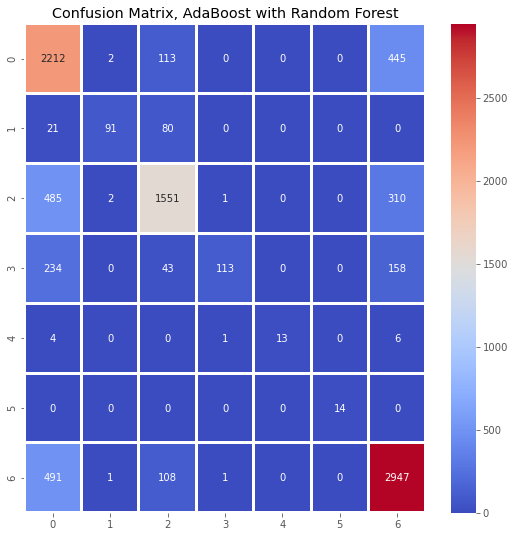

In [318]:
plot_confusion_matix(ada, ch_attributes_scaled_val, ch_labels_encoded_val, "Confusion Matrix, AdaBoost with Random Forest")

The matrix above is slightly confusing (as its title suggests). Rows represent actual classes, while columns represent predicted classes. Thus, 2212 cars of class "0" (cars in "excellent" condition) are classified correctly (TP) as in "excellent" condition. 560 cars (sum of all figures in row "0", i.e. 2 + 113 + 445) are categorised in excellent state, but this is not true (FP).

On the other hand, 1235 cars (all figures in column "0", save the first one, i.e. 21 + 485 + 234 + 4 + 491) are declared to be in poorer or in other condition, whereas they should be classified as "excellent". 

Most cars in "unknown" condition (2947) are categorised properly (the dark red square in the lower-right angle).

A ROC Curve (a Receiver Operating Characteristic curve) is another metrics for measuring classification performance. However, it could be used only for binary and not for multi-classification tasks.

#### 4.2.4.  Summary of Classification

This section summarises all scores since it is hard to track performance of each classification algorithm for each set. All accuracy scores are listed first.

##### ACCURACY scores, training and validation set, all algorithms

In [319]:
print(f"SGDClassifier, train, accuracy: {accuracy_score(ch_labels_encoded_train, sgd_clf.predict(ch_attributes_scaled_train))}")
print(f"SGDClassifier, validation, accuracy: {accuracy_score(ch_labels_encoded_val, sgd_clf.predict(ch_attributes_scaled_val))}")
print("========================")

print(f"Random Forest, train, accuracy: {accuracy_score(ch_labels_encoded_train, random_forest.predict(ch_attributes_scaled_train))}")
print(f"Random Forest, validation, accuracy: {accuracy_score(ch_labels_encoded_val, random_forest.predict(ch_attributes_scaled_val))}")
print("========================")

print(f"Ada Boost, train, accuracy: {accuracy_score(ch_labels_encoded_train, ada.predict(ch_attributes_scaled_train))}")
print(f"Ada Boost, validation, accuracy: {accuracy_score(ch_labels_encoded_val, ada.predict(ch_attributes_scaled_val))}")

SGDClassifier, train, accuracy: 0.4524991067529477
SGDClassifier, validation, accuracy: 0.4690377897745316
Random Forest, train, accuracy: 0.5256130321436606
Random Forest, validation, accuracy: 0.5602836879432624
Ada Boost, train, accuracy: 0.5765347307687217
Ada Boost, validation, accuracy: 0.7347306023076109


**Note**: *it is not clear why "accuracy" scores on the training set for all models are slightly different here from those obtained above*.

In terms of "accuracy", AdaBoost performs best both on training and on validation sets.

##### F1 SCORES, scores, training and validation set, all algorithms

In [320]:
print(f"SGDClassifier, train, f1 score: {f1_score(ch_labels_encoded_train, sgd_clf.predict(ch_attributes_scaled_train), average = 'weighted')}")
print(f"SGDClassifier, validation, f1 score: {f1_score(ch_labels_encoded_val, sgd_clf.predict(ch_attributes_scaled_val), average = 'weighted')}")
print("========================")

print(f"Random Forest, train, f1 score: {f1_score(ch_labels_encoded_train, random_forest.predict(ch_attributes_scaled_train), average = 'weighted')}")
print(f"Random Forest, validation, f1 score: {f1_score(ch_labels_encoded_val, random_forest.predict(ch_attributes_scaled_val), average = 'weighted')}")
print("========================")

print(f"Ada Boost, train, f1 score: {f1_score(ch_labels_encoded_train, ada.predict(ch_attributes_scaled_train), average = 'weighted')}")
print(f"Ada Boost, validation, f1 score: {f1_score(ch_labels_encoded_val, ada.predict(ch_attributes_scaled_val), average = 'weighted')}")

SGDClassifier, train, f1 score: 0.446394999930562
SGDClassifier, validation, f1 score: 0.46305846040902215
Random Forest, train, f1 score: 0.49227319433378475
Random Forest, validation, f1 score: 0.5291710793539408
Ada Boost, train, f1 score: 0.5558876583477173
Ada Boost, validation, f1 score: 0.7249015304760632


**Note**: *scores on the training set here are also higher than those obtained earlier*.

Ada Boost is the best performing model on validation data, including in terms of "accuracy", "precision", and "recall".

#### 4.2.5. Select Model

Taking into account the scores above, **Adaptive Boosting is chosen for the classifier that best describes used cars condition**. Its performance is checked on the testing set below.

In [321]:
print(f"Ada Boost, test, accuracy: {accuracy_score(ch_labels_encoded_test, ada.predict(ch_attributes_scaled_test))}")

Ada Boost, test, accuracy: 0.5793373557743199


Ada Boost's "accuracy" on the testing set is good (57%) but not as good as that on the validation set (72.8%). Its performance with f1 score is shown below.

In [322]:
print(f"Ada Boost, f1 score: {f1_score(ch_labels_encoded_test, ada.predict(ch_attributes_scaled_test), average = 'weighted')}")

Ada Boost, f1 score: 0.5576988520064153


Precision and accuracy are higher than 50% but does not reach 70% as did this model on validation set. Confusion matrix and classification report for the testing set are displayed below. 

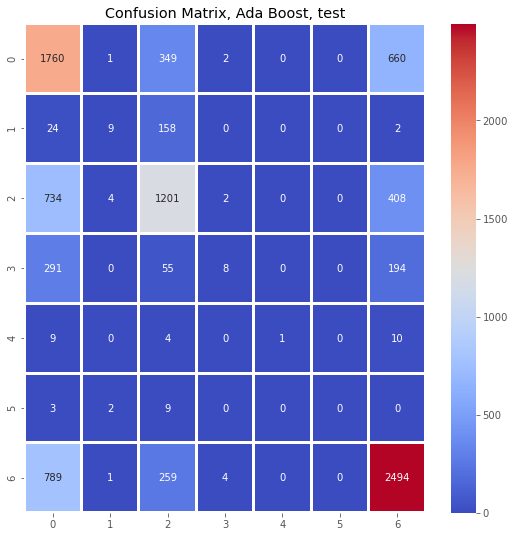

In [323]:
plot_confusion_matix(ada, ch_attributes_scaled_test, ch_labels_encoded_test, "Confusion Matrix, Ada Boost, test" )

This Confusion matrix is similar to the one displayed earlier. Cars with "unknown" condition are easily recognised, as well as many of those in "excellent" state. Classes 1, 3, 4, and 5 are hard for categorisation due to insufficient number of samples. Hence, the model is good for recognising cars mainly in "excellent", "good", and in "unknown" condition.

In [324]:
print(classification_report(ch_labels_encoded_test, ada.predict(ch_attributes_scaled_test), zero_division = 0))

              precision    recall  f1-score   support

           0       0.49      0.63      0.55      2772
           1       0.53      0.05      0.09       193
           2       0.59      0.51      0.55      2349
           3       0.50      0.01      0.03       548
           4       1.00      0.04      0.08        24
           5       0.00      0.00      0.00        14
           6       0.66      0.70      0.68      3547

    accuracy                           0.58      9447
   macro avg       0.54      0.28      0.28      9447
weighted avg       0.58      0.58      0.56      9447



In conclusion it could be said that **car's value and its features only to certain extent could predict its technical condition**. The testing excercise showed that this extent might go beyond 55% (with the available attributes and observations).

#### 4.2.5. Present a complete classification solution

This section presents complete solution for testing Hypothesis No. 2. All exploratory steps and considerations duly described above are deliberately omitted. Sklearn's Pipeline() function is used for simultaneous data scaling and modelling. 

Input data are those cleaned and stored in `used_cars_p` (188922 observations and 12 features) for Regression solution above. The dataset is split only into training and testing sets with a ratio of 80:20. Both sets are scored with "f1_score" and "accuracy".

In [325]:
used_cars_p.shape

(188922, 12)

Preprocessing begins with separation: one variable holds the features and another - the labels (cars' condition).

In [326]:
used_cars_p_features = used_cars_p.drop(["condition"], axis = 1)

In [327]:
used_cars_p_label = used_cars_p["condition"]

All category featues are **converted into dummies**, and **labels are encoded**. Thereafter, features and the label column are **split into training and testing sets**. Labels are used for stratifying the datasets. Please, note that this complete solution uses the **whole set of data and not half of it**.

In [328]:
used_cars_p_features = pd.get_dummies(used_cars_p_features)

In [329]:
used_cars_p_label = encoder.fit_transform(used_cars_p_label)

In [330]:
features_train, features_test, labels_train, labels_test = train_test_split(used_cars_p_features,
                                                           used_cars_p_label,
                                                           stratify = used_cars_p_label,
                                                           test_size = 0.2,
                                                           random_state = 35)

As mentioned earlier, it is very important to keep track on **datasets' shape**. 

In [331]:
features_train.shape,  labels_train.shape, features_test.shape, labels_test.shape

((151137, 126), (151137,), (37785, 126), (37785,))

Pipeline() simplifies computing by simultaneous scaling and modelling. The latter are stored in `pipe_class` variable.

In [332]:
pipe_class = Pipeline([("scaler", MinMaxScaler()), 
                       ("AdaBoost_RF", AdaBoostClassifier(RandomForestClassifier(max_depth = 8, n_estimators = 40)))])

At the end, pipe receives the training data. Thereafter, model's **performance (with training data) is evaluated**. 

In [333]:
pipe_class.fit(features_train, labels_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('AdaBoost_RF',
                 AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                                          n_estimators=40)))])

In [334]:
print(f"Ada Boost, train, accuracy: {accuracy_score(labels_train, pipe_class.predict(features_train))}")
print(f"Ada Boost, train, f1_score: {f1_score(labels_train, pipe_class.predict(features_train), average = 'weighted')}")

Ada Boost, train, accuracy: 0.7041756816663027
Ada Boost, train, f1_score: 0.6965939775145589


Both "accuracy" and "f1" improves on the whole set. Those on the testing set should be similar.

In [335]:
print(f"Ada Boost, test, accuracy: {accuracy_score(labels_test, pipe_class.predict(features_test))}")
print(f"Ada Boost, test, f1_score: {f1_score(labels_test, pipe_class.predict(features_test), average = 'weighted')}")

Ada Boost, test, accuracy: 0.651528384279476
Ada Boost, test, f1_score: 0.6404887757134206


The model, as expected, performs slightly poorer on the testing set. Nonetheless, these scores are much closer to the threshold of 70%. Testing outcomes are reviewed with classification report below.

In [336]:
print(classification_report(labels_test, pipe_class.predict(features_test)))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61     11108
           1       0.52      0.30      0.38       766
           2       0.67      0.59      0.63      9372
           3       0.54      0.13      0.21      2194
           4       0.44      0.38      0.41       101
           5       0.47      0.13      0.21        53
           6       0.74      0.77      0.75     14191

    accuracy                           0.65     37785
   macro avg       0.56      0.43      0.46     37785
weighted avg       0.65      0.65      0.64     37785



In [337]:
# Check classes
encoder.classes_

array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage',
       'unknown'], dtype=object)

Precision is high for cars in "good" and in "unknown" condition, whereas "recall" is good for "excellent" cars and for those in "unknown" state. Both metrics could be improved for cars in classes 1, 3, and 5 ("fair", "like new", and "salvage").

## 5. Conclusion and Topics for Further Discussion

Data processing and computations above suggest that predicting a car's price and its condition is not impossible, when its features are taken into account. However, the available data only to a certain extent allowed Hypothesis No. 1 not to be rejected. These data are at the bottom of a regression model, predicting vehicles' price. It returns not so correct values: its error went down to 9000 USD (on the testing set). This is not a small amount, having in mind that the mean price of all cars (except of those costing more than a million USD) is somewhere around 1800 USD. Model's inaccuracy could be explained either with prices' high variance, or with the need of removing many columns from the table.

Similar conclusions could be drawn about modelling cars' condition. In general, it is possible a car's condition to be predicted when its attributes are known in advance. However, Ada Boost - the algorithm offered the strongest model, barely reached the threshold of 70% on f1 score. Thus, Hypothesis No. 2 cannot entirely be rejected but it cannot be approved unconditionally either.

Notwithstanding these results, it is not impossible both models to perform better with more complete datasets. With regard to this, it would not be excessive if car selling platforms (where data are being scraped from) introduce compulsory requirements for entering all car features into the selling form, as well as internal checks for handling errors.

## References

[1] NerdWallet. How to Buy a Used Car. Philip Reed, September 25, 2020 (https://www.nerdwallet.com/article/loans/auto-loans/buy-used-car), (Accessed online: October 2020)

[2] Leith C. MacArthur. How to Buy an Excellent Used Car: A Companion Guide for Women. 1st Book Library, February 20, 2001. (https://www.amazon.com/How-Buy-Excellent-Used-Car/dp/0759604819), (Accessed online: October 2020)

[3] Hara K., Asahi Y. (2020) Feature Analysis of Customers Purchasing Cars in Japan. In: Yamamoto S., Mori H. (eds) Human Interface and the Management of Information. Designing Information. HCII 2020. Lecture Notes in Computer Science, vol 12184. Springer, Cham. https://doi.org/10.1007/978-3-030-50020-7_13, (Accessed online: October 2020)

[4] Money Saving Expert. 19 Tips for Buying a Used Car. March 1, 2018 (https://www.moneysavingexpert.com/car-finance/buying-used-car/), (Accessed online: October 2020)

[5] Citizens Advice. Buying a used car. (https://www.citizensadvice.org.uk/consumer/buying-or-repairing-a-car/buying-a-used-car/), (Accessed online: October 2020)

[6] Which? How to buy the best used car. October 1, 2020 (https://www.which.co.uk/reviews/new-and-used-cars/article/how-to-buy-the-best-car/how-to-buy-the-best-used-car-anNPo1k4R4hS), (Accessed online: October 2020)

[7] Kaggle.com. Used Cars Dataset (https://www.kaggle.com/austinreese/craigslist-carstrucks-data), (Accessed online: October 2020)

[8]ARAG. Buying a Car on Craigslist? 7 Steps to Buy Smart and Stay Safe (https://www.araglegal.com/individuals/learning-center/topics/car-and-driver/buying-a-used-car-on-cragslist), (Accessed online: October 2020)

[9] Haynes. What is a transmission on your car? (https://haynes.com/en-gb/tips-tutorials/what-transmission-your-car), (Accessed online: October 2020)

[10] Géron, A. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media, Inc., September 2019 (available online at: https://www.knowledgeisle.com/wp-content/uploads/2019/12/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf)
